In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import torch
from transformers import AutoTokenizer
import os
import pandas as pd

from src.router_loading_utils import create_dataset_routing_statistics
from src.router_distribution_analysis import get_global_router_distribution, get_per_expert_router_distribution, get_per_layer_router_distribution
from src.visualize import plot_router_distribution, plot_per_expert_router_distribution, plot_per_layer_router_distribution

/users/anowak/developer/moe-router-exploration/venv-arm/lib/python3.12/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

**Here the router distributions we will visualize come from the probability distribution from the experts when they are inside the top-k. For some models the top-k probability distribution will be renormalized to 1, but for others it will not, here we want to visualize the value (or we can call it score) that is literally being used in the weighted sum (so as to see how much they are contributing to the weighted sum)**

So it is better to say we are visualizing the scores and not the probabilities (as the values inside the top-k for majority of the models are not renormalized)

**Also all the models we are testing are base models except for gpt-oss (which doesn't have a base model)**

# Deepseek-MoE

*layer 0 in deepseek-moe is dense and the top-k in deepseek-moe is of 6 and it has 64 routable experts and 2 shared experts*

## MMLU

In [3]:
deepseek_moe_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/cais-mmlu"
deepseek_moe_root_path = os.path.expandvars(deepseek_moe_root_path)

deepseek_moe_subject_list = create_dataset_routing_statistics(deepseek_moe_root_path)

Found: virology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/cais-mmlu/virology/EN/router_distributions.pt
Found: computer_security/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/cais-mmlu/computer_security/EN/router_distributions.pt
Found: high_school_us_history/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/cais-mmlu/high_school_us_history/EN/router_distributions.pt
Found: professional_accounting/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/cais-mmlu/professional_accounting/EN/router_distributions.pt
Found: college_medicine/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-explorat

### Global router distribution

In [4]:
deepseek_moe_global_probs = get_global_router_distribution(deepseek_moe_subject_list)

Global probs shape: torch.Size([394855236])


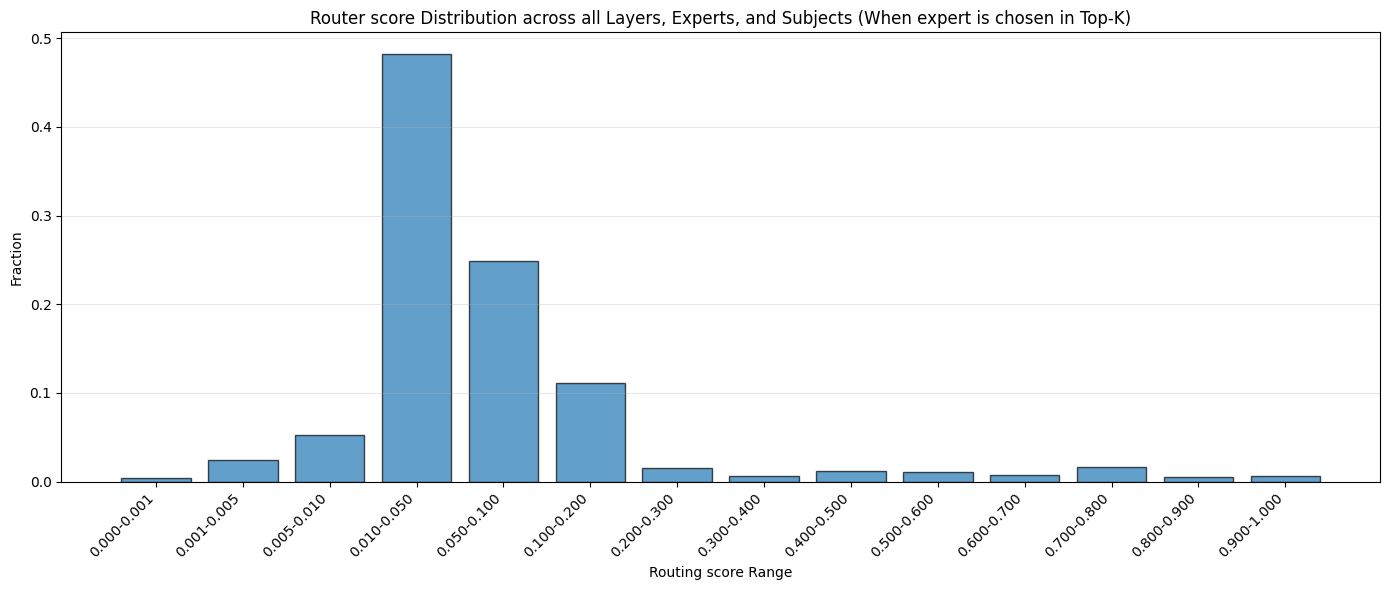

In [5]:
print(f"Global probs shape: {deepseek_moe_global_probs.shape}")
plot_router_distribution(deepseek_moe_global_probs)

### Per layer distribution

In [6]:
deepseek_per_layer_probs = get_per_layer_router_distribution(deepseek_moe_subject_list)

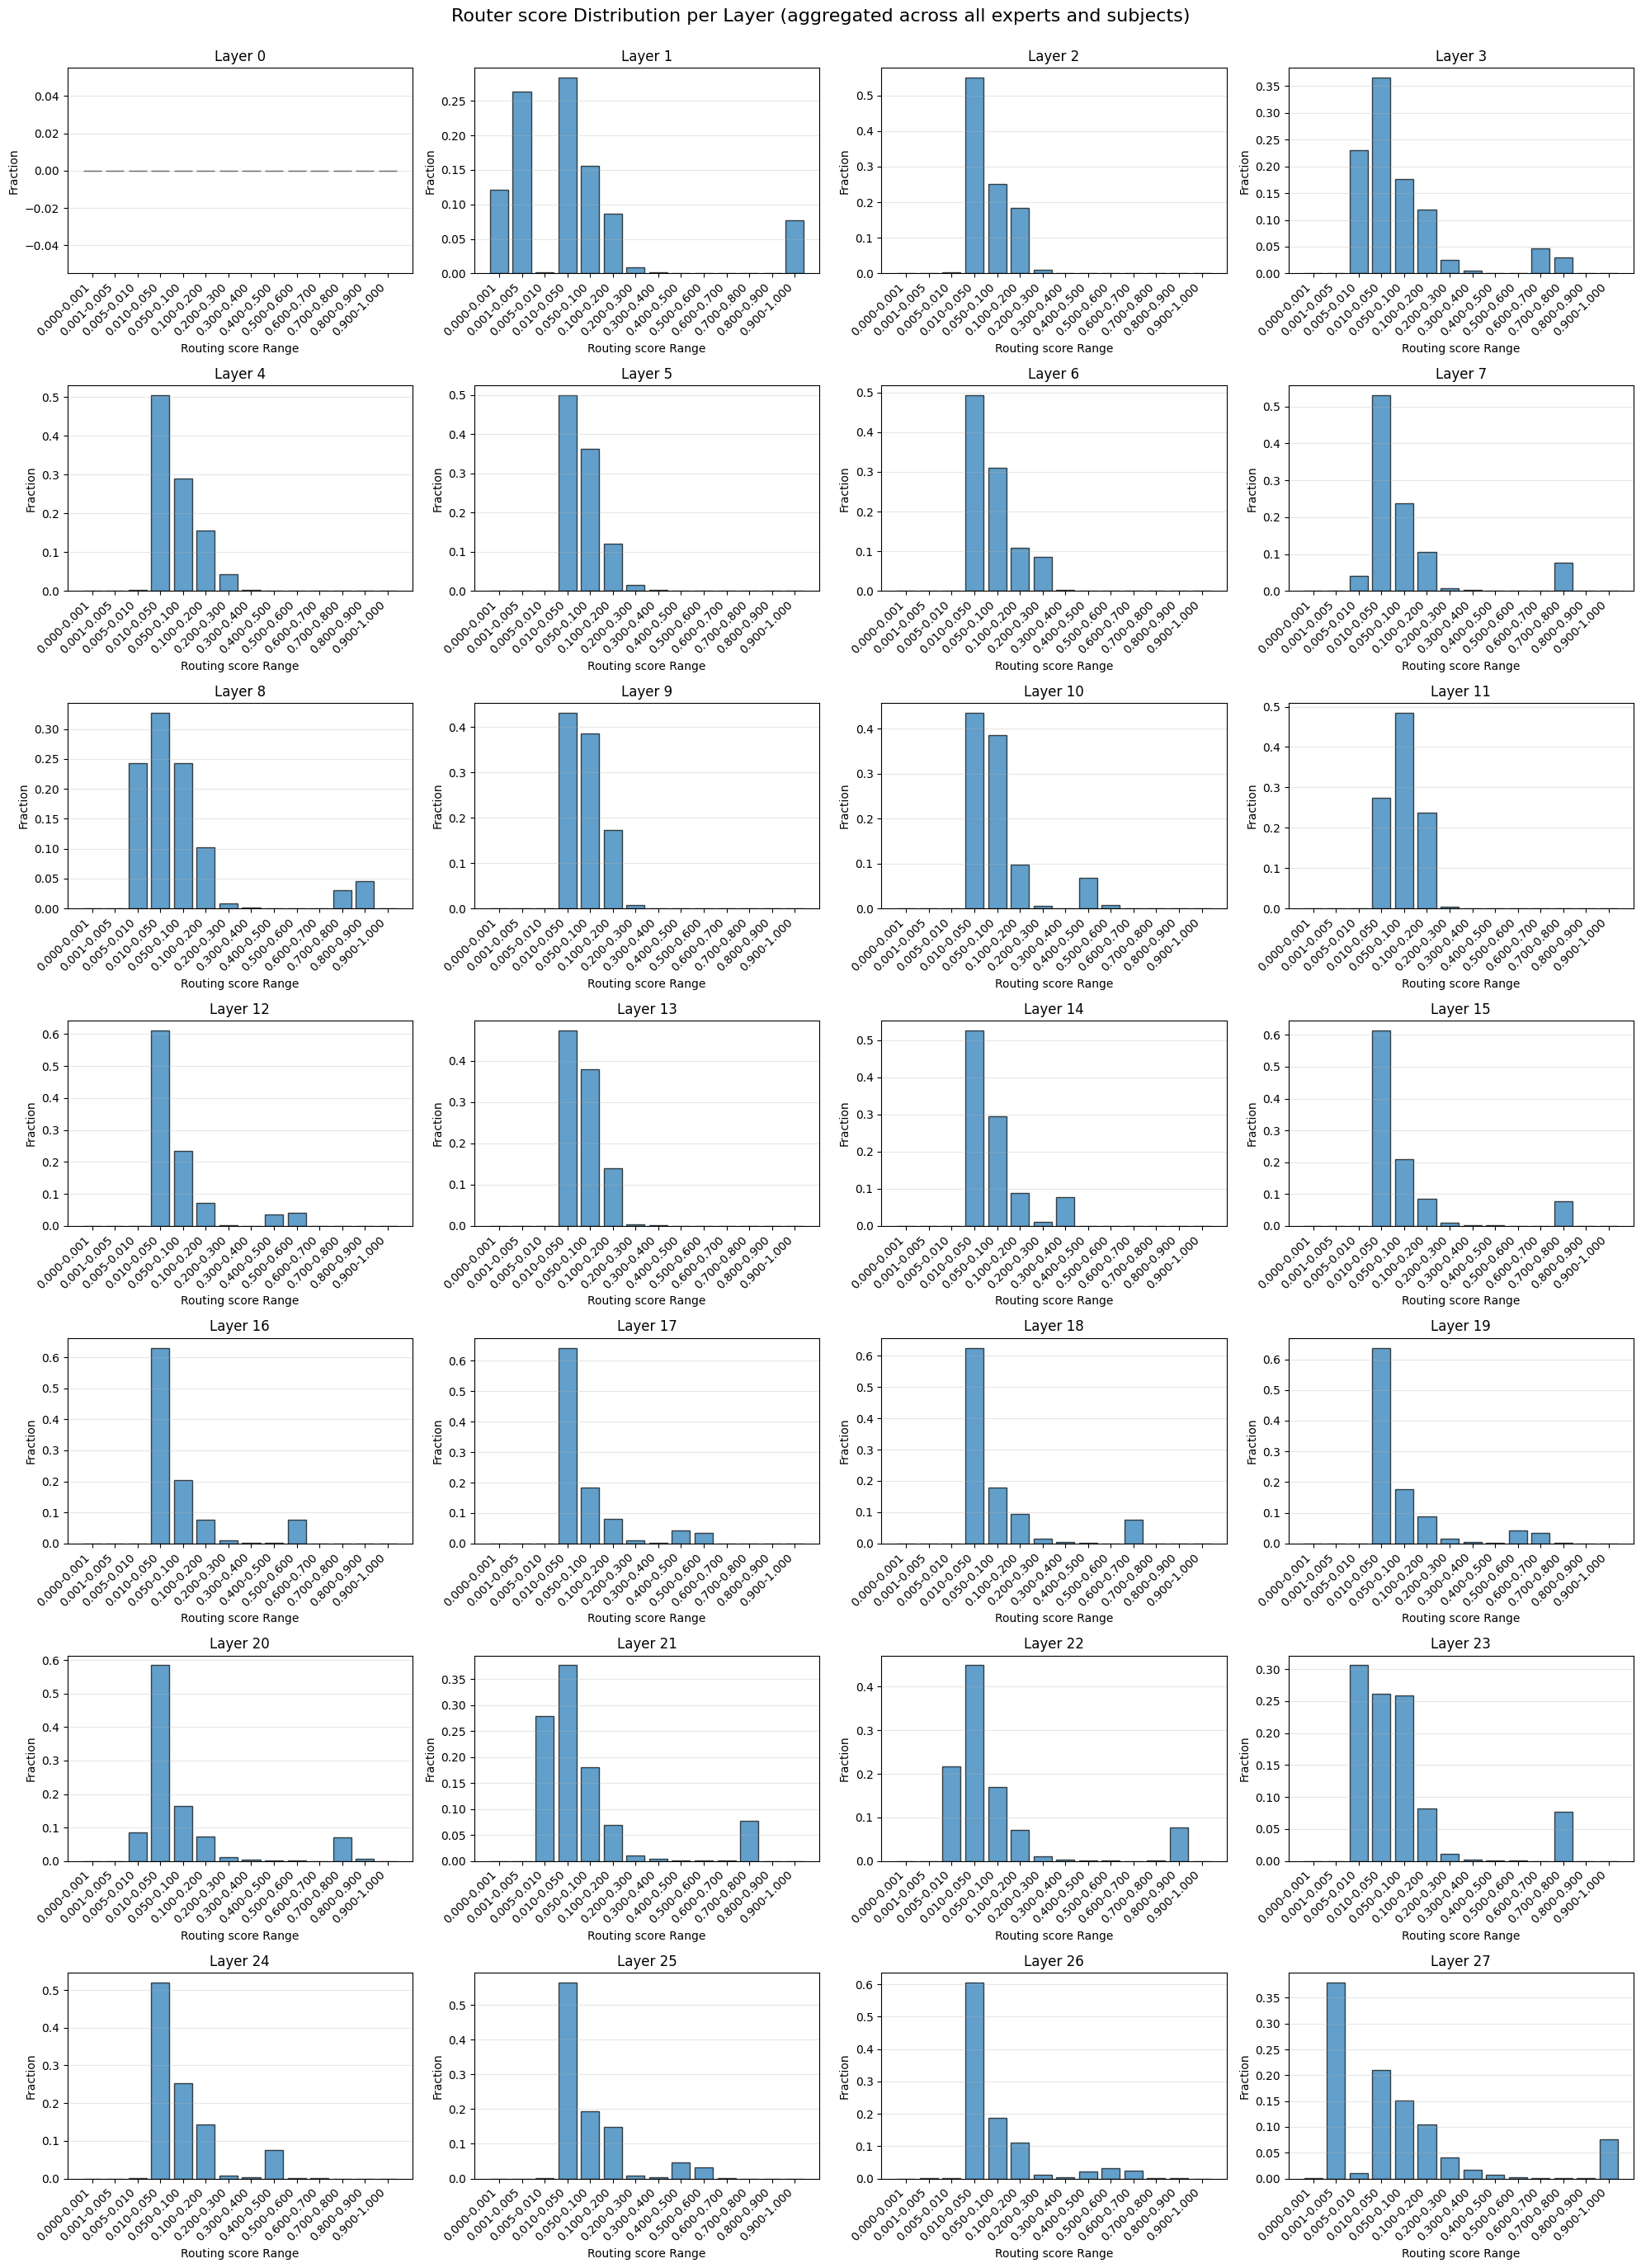

In [7]:
plot_per_layer_router_distribution(deepseek_per_layer_probs) 

## MMLU PRO

In [8]:
deepseek_moe_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/TIGER-Lab-MMLU-Pro"
deepseek_moe_root_path = os.path.expandvars(deepseek_moe_root_path)

deepseek_moe_subject_list = create_dataset_routing_statistics(deepseek_moe_root_path)

Found: biology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/TIGER-Lab-MMLU-Pro/biology/EN/router_distributions.pt
Found: chemistry/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/TIGER-Lab-MMLU-Pro/chemistry/EN/router_distributions.pt


Found: physics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/TIGER-Lab-MMLU-Pro/physics/EN/router_distributions.pt
Found: engineering/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/TIGER-Lab-MMLU-Pro/engineering/EN/router_distributions.pt
Found: economics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/TIGER-Lab-MMLU-Pro/economics/EN/router_distributions.pt
Found: health/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-deepseek-moe-16b-base/TIGER-Lab-MMLU-Pro/health/EN/router_distributions.pt
Found: history/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/deepseek-ai-d

### Global router distribution

In [9]:
deepseek_moe_global_probs = get_global_router_distribution(deepseek_moe_subject_list)

Global probs shape: torch.Size([765976176])


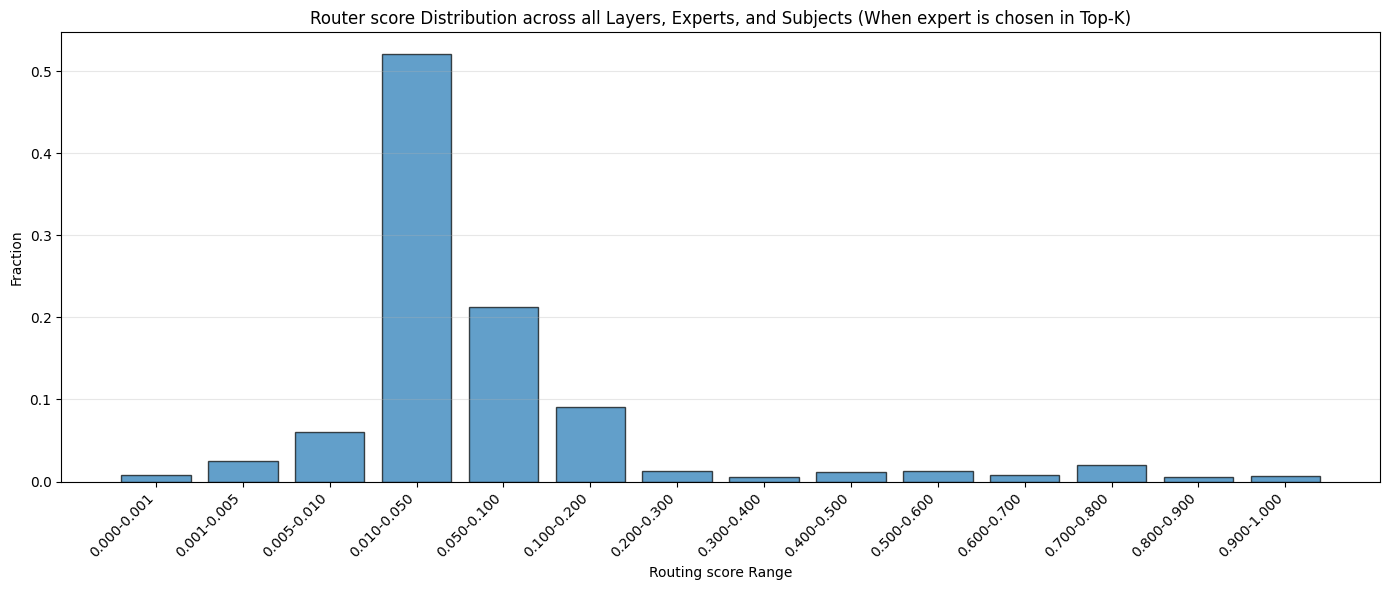

In [10]:
print(f"Global probs shape: {deepseek_moe_global_probs.shape}")
plot_router_distribution(deepseek_moe_global_probs)

the interesting here is that this model is the one that has the one that has the biggest fraction of probability values in routing in the top-k below 0.01 compared to the other MoE models we are testing here*

### Per layer distribution

In [ ]:
deepseek_per_layer_probs = get_per_layer_router_distribution(deepseek_moe_subject_list)

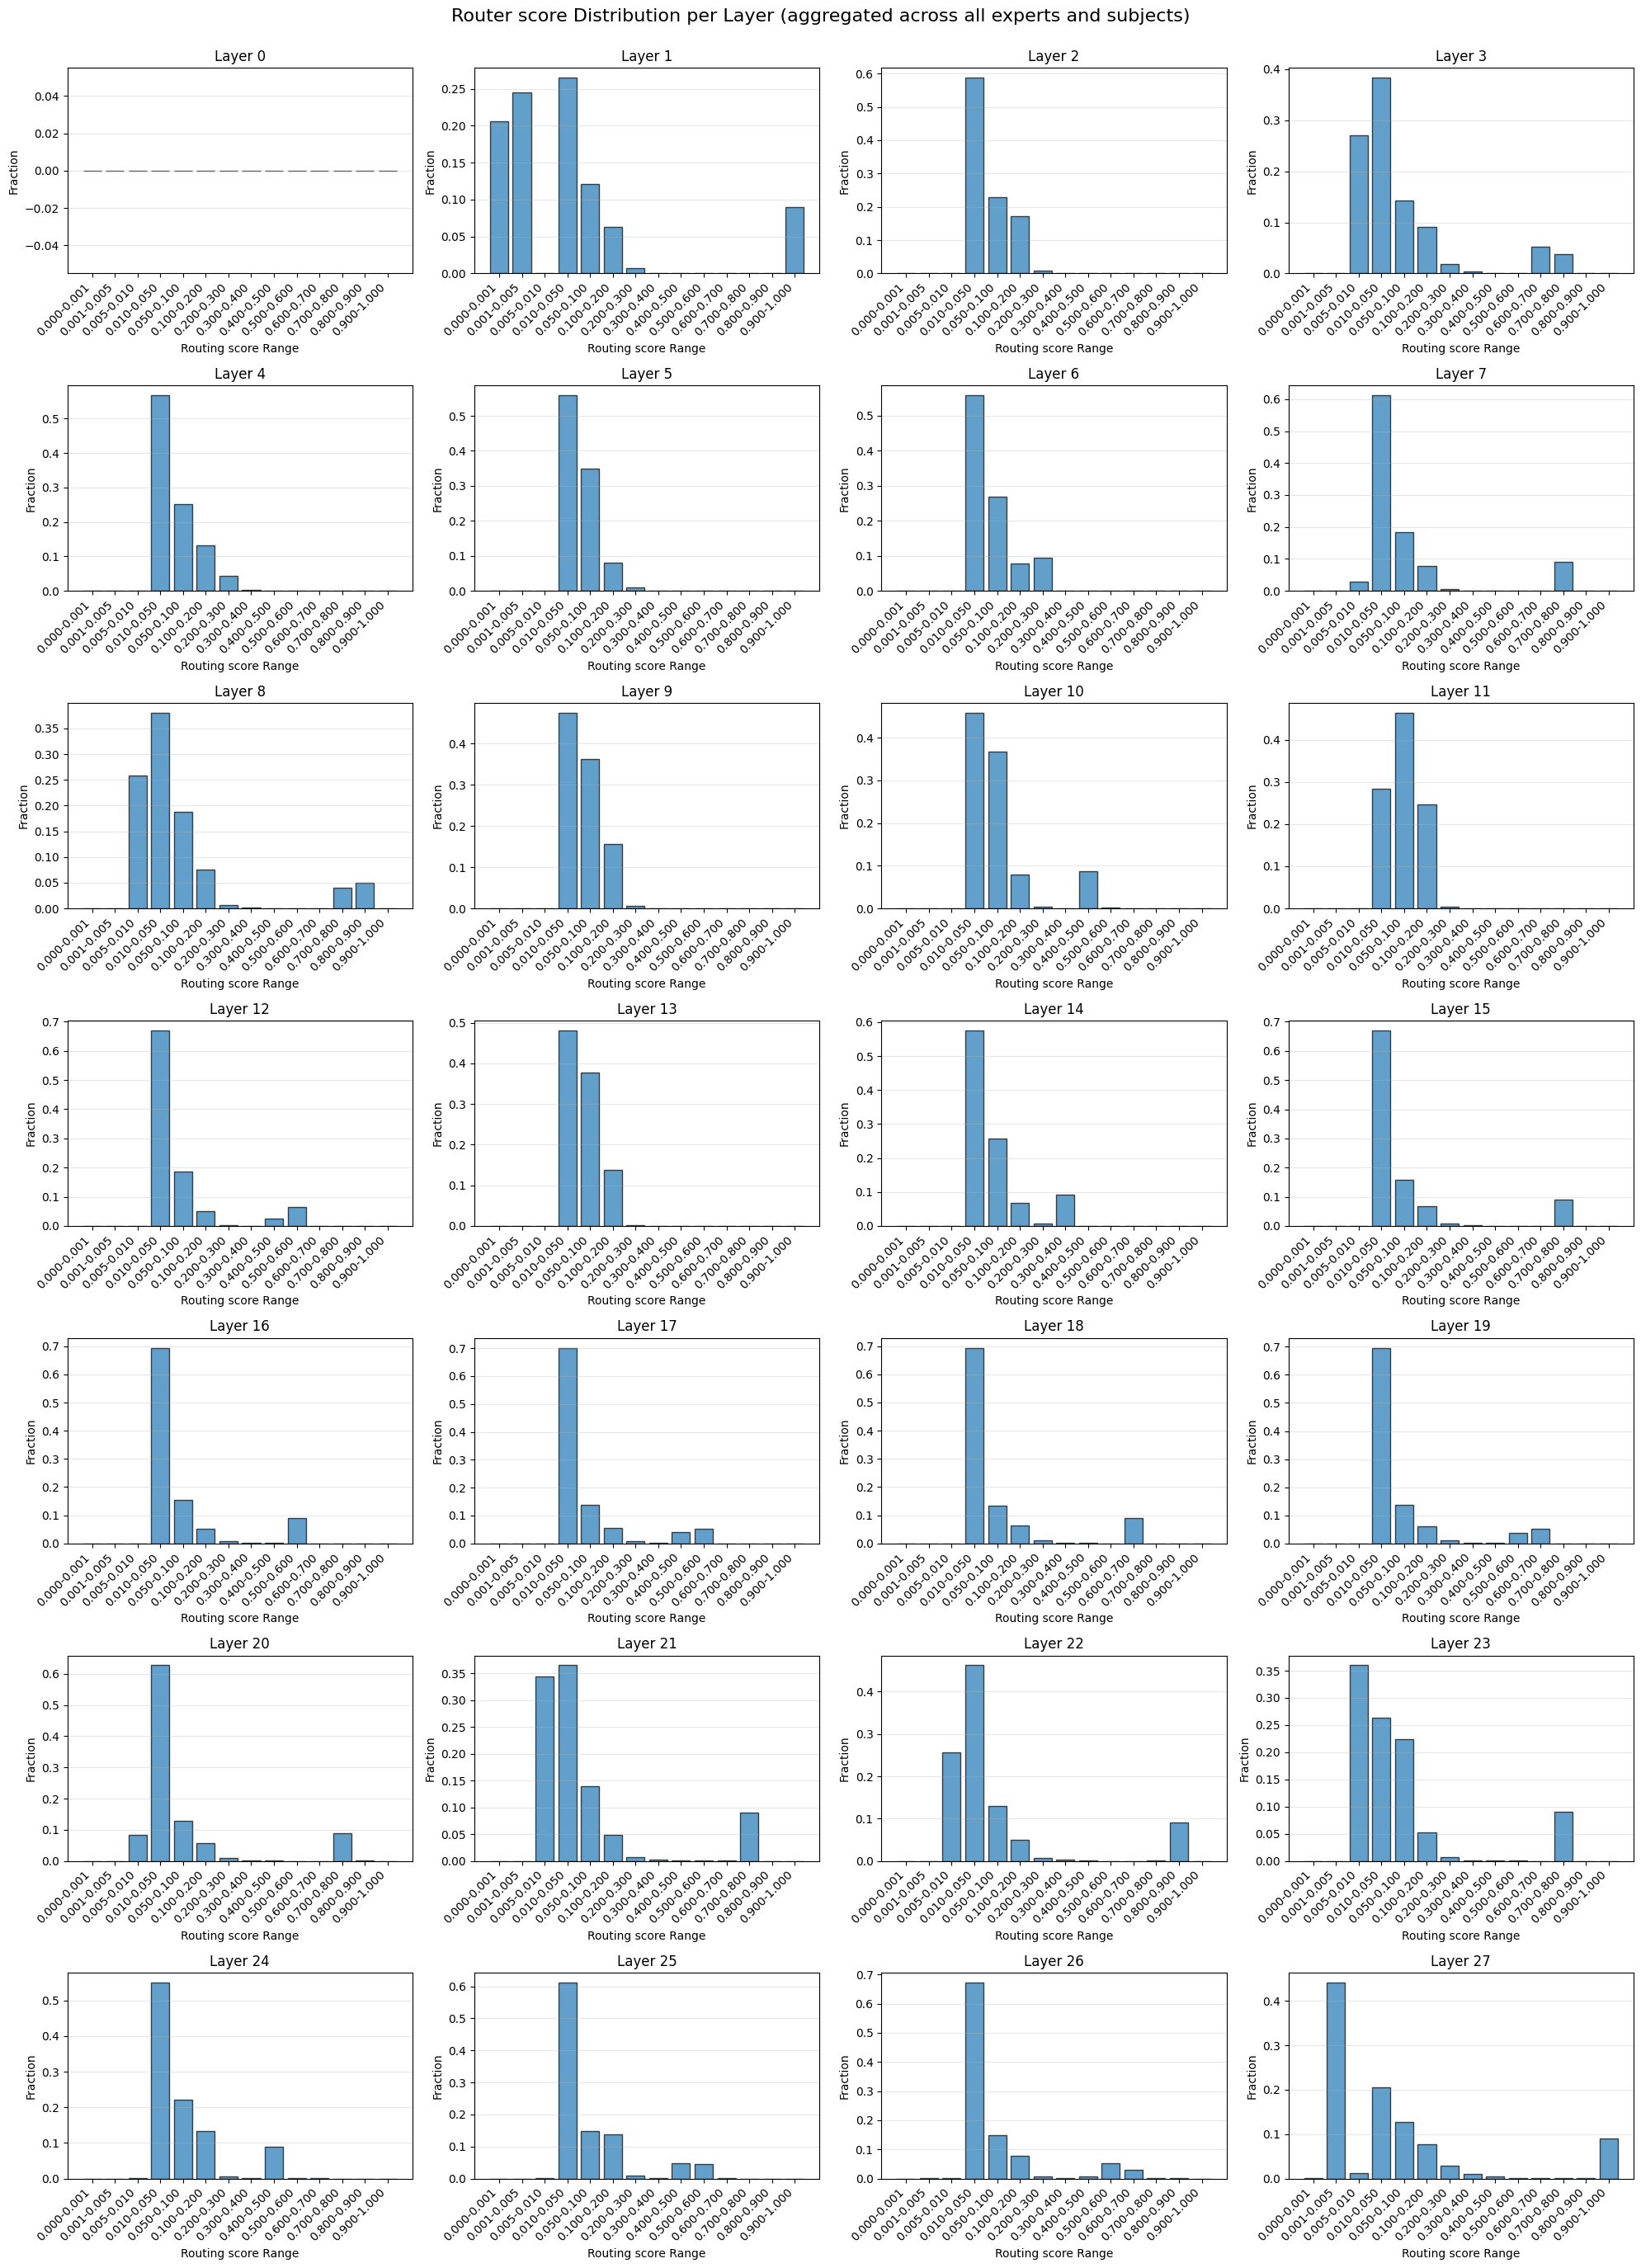

In [12]:
plot_per_layer_router_distribution(deepseek_per_layer_probs)

In [13]:
# memory cleanup

del deepseek_moe_subject_list
del deepseek_moe_global_probs
del deepseek_per_layer_probs

# GPT-OSS

**With GPT-OSS we don't apply the chat template to get the router distributions, so here maybe also the results can change because of this as the hidden state of each token can change between layers if we applied the chat template**

The top-k in this model is of 4 experts and it has 32 routable experts,

## MMLU

In [14]:
gpt_oss_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu"
gpt_oss_root_path = os.path.expandvars(gpt_oss_root_path)

gpt_oss_subject_list = create_dataset_routing_statistics(gpt_oss_root_path)

Found: virology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/virology/EN/router_distributions.pt
Found: computer_security/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/computer_security/EN/router_distributions.pt
Found: high_school_us_history/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/high_school_us_history/EN/router_distributions.pt
Found: professional_accounting/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/professional_accounting/EN/router_distributions.pt
Found: college_medicine/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mm

Found: college_mathematics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/college_mathematics/EN/router_distributions.pt
Found: professional_medicine/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/professional_medicine/EN/router_distributions.pt
Found: college_computer_science/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/college_computer_science/EN/router_distributions.pt
Found: human_sexuality/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/cais-mmlu/human_sexuality/EN/router_distributions.pt
Found: professional_law/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-g

### Global router distribution

In [15]:
gpt_oss_global_probs = get_global_router_distribution(gpt_oss_subject_list)

Global probs shape: torch.Size([220727040])


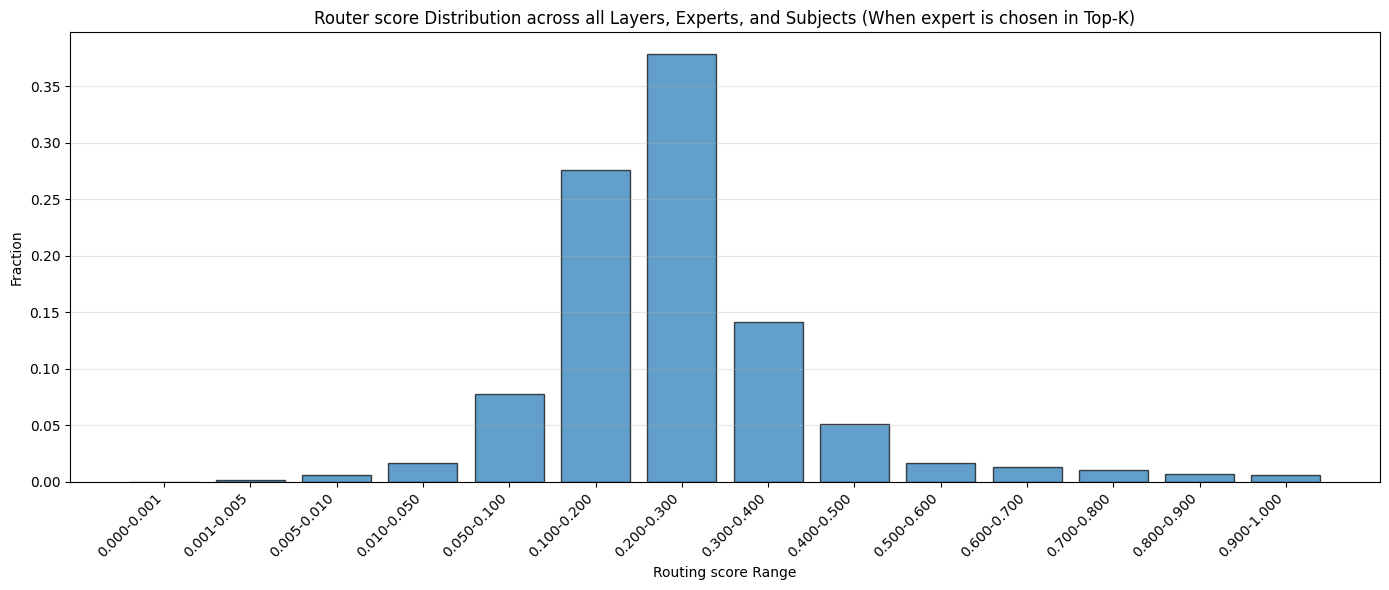

In [16]:
print(f"Global probs shape: {gpt_oss_global_probs.shape}")
plot_router_distribution(gpt_oss_global_probs)

### Per layer router distribution

In [17]:
gpt_oss_per_layer_probs = get_per_layer_router_distribution(gpt_oss_subject_list)

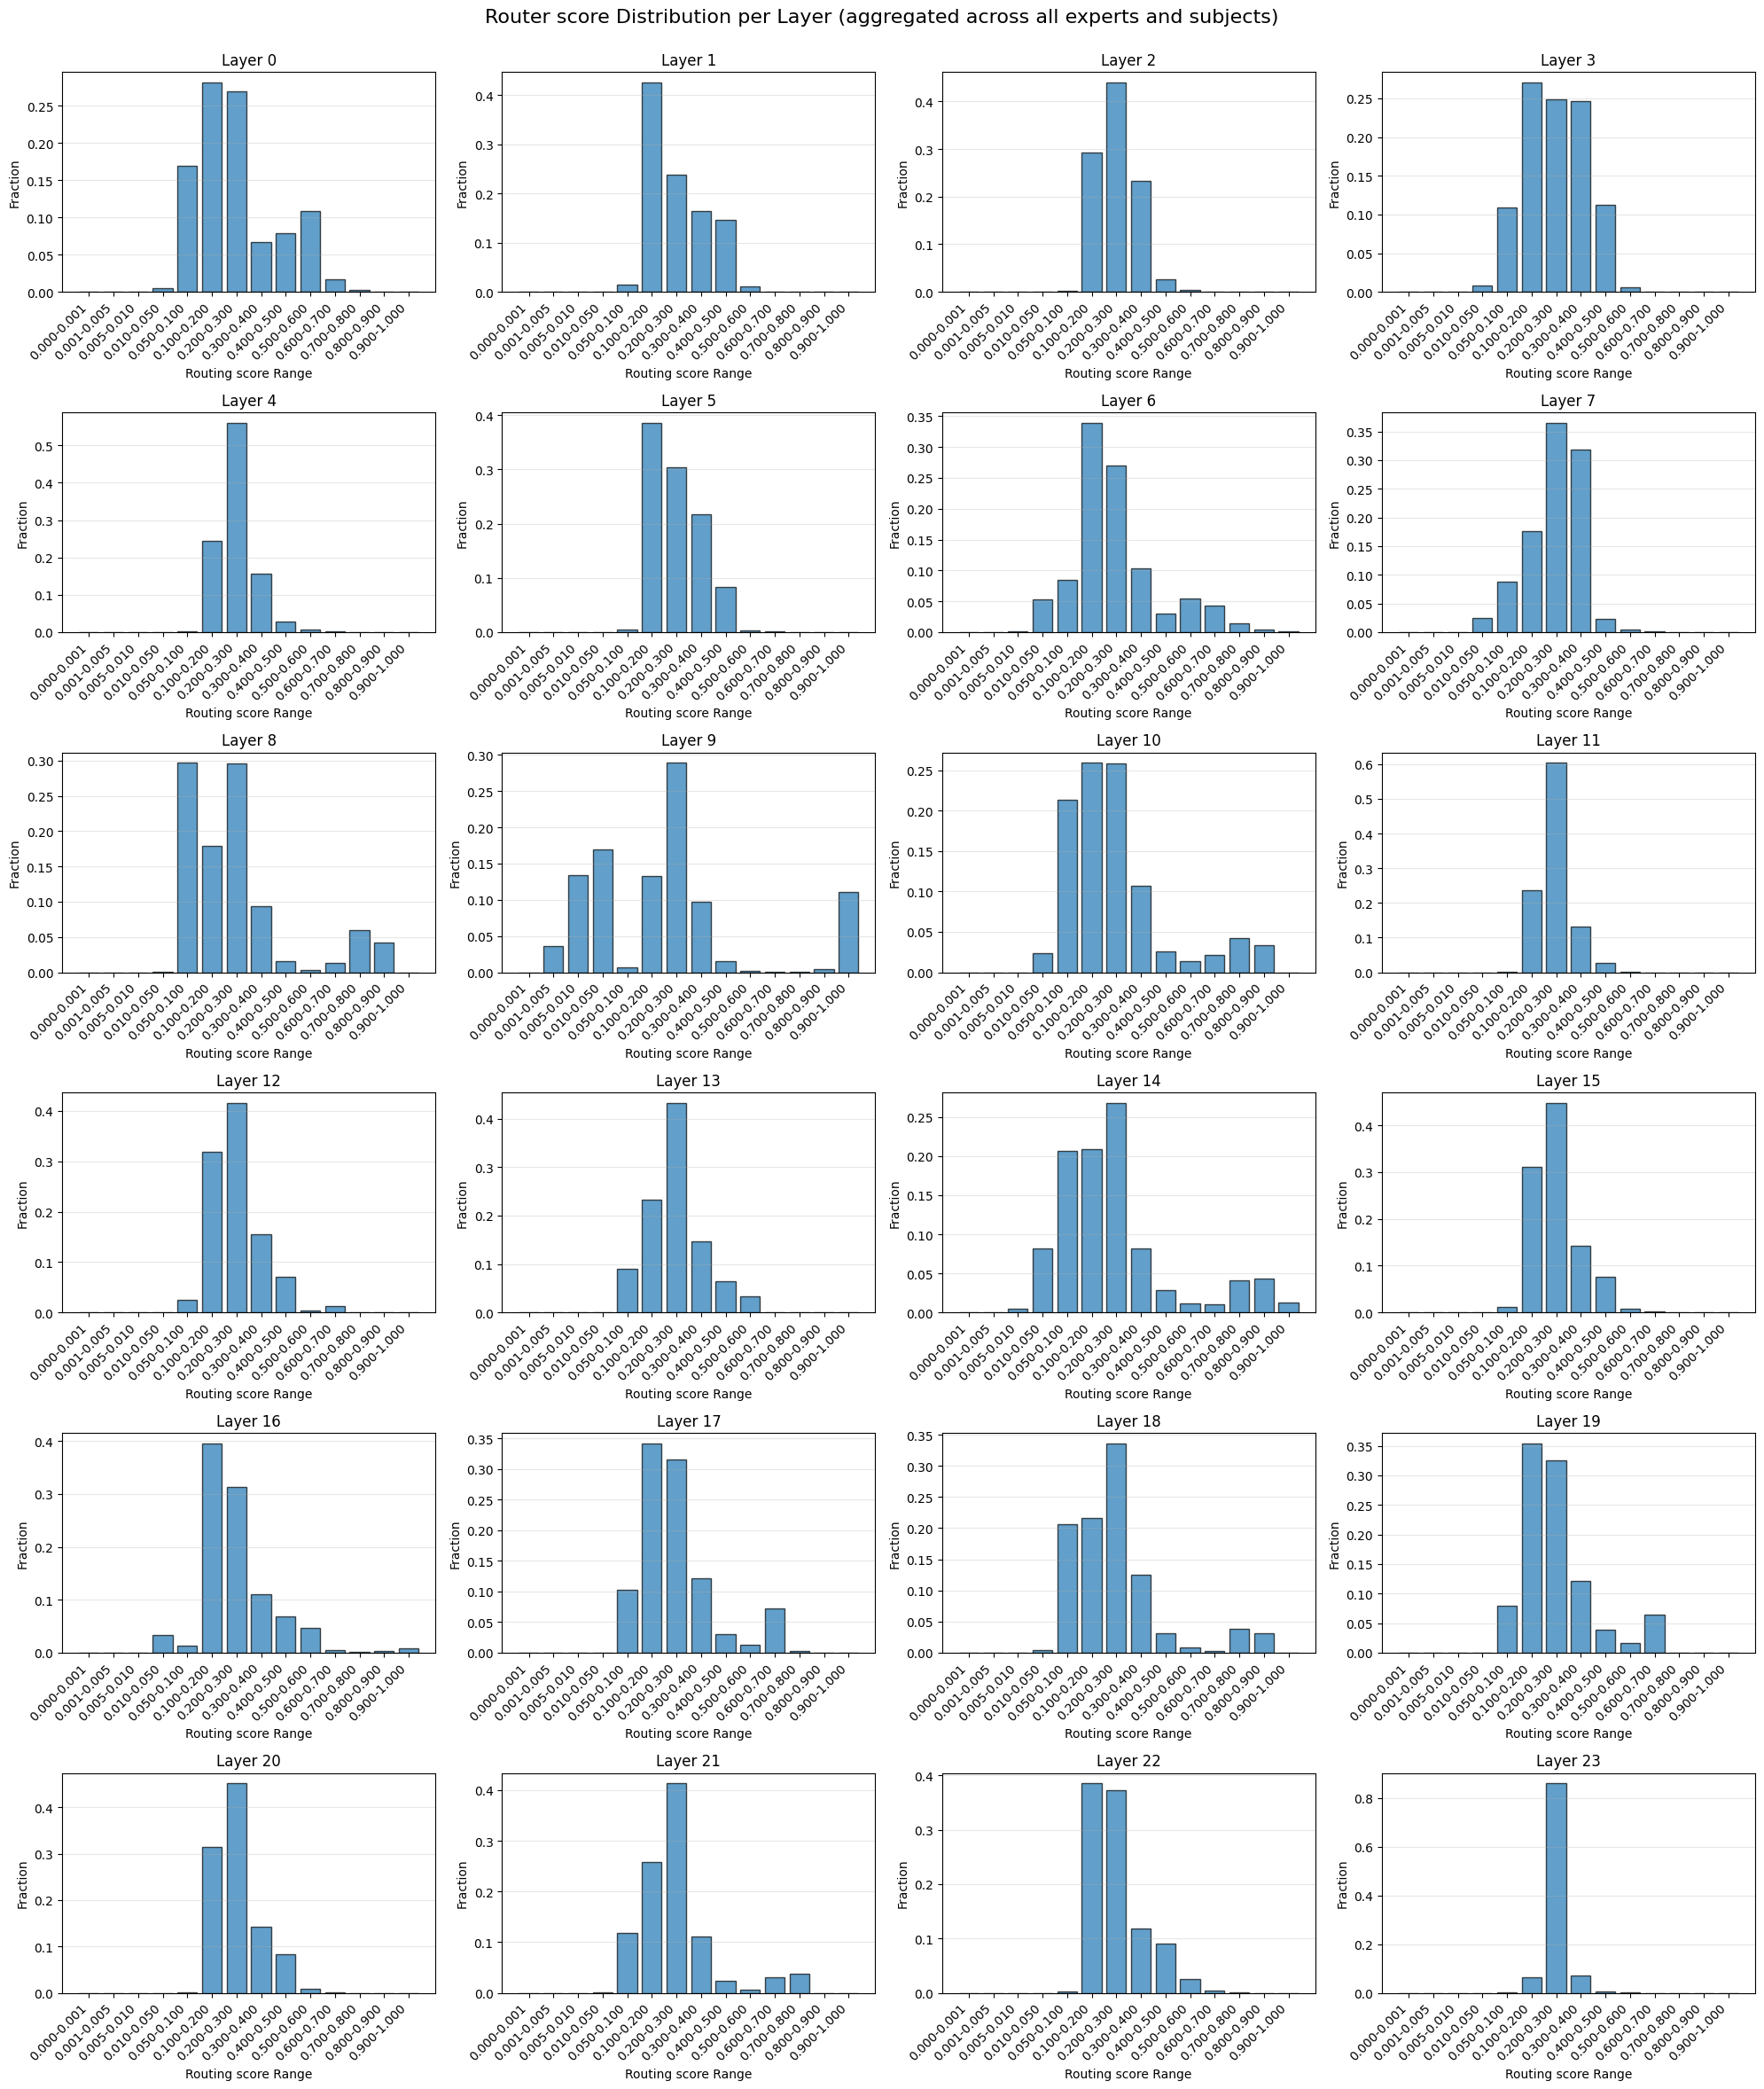

In [18]:
plot_per_layer_router_distribution(gpt_oss_per_layer_probs)

## MMLU PRO

In [19]:
gpt_oss_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/TIGER-Lab-MMLU-Pro"
gpt_oss_root_path = os.path.expandvars(gpt_oss_root_path)

gpt_oss_subject_list = create_dataset_routing_statistics(gpt_oss_root_path)

Found: biology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/TIGER-Lab-MMLU-Pro/biology/EN/router_distributions.pt
Found: chemistry/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/TIGER-Lab-MMLU-Pro/chemistry/EN/router_distributions.pt
Found: physics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/TIGER-Lab-MMLU-Pro/physics/EN/router_distributions.pt
Found: engineering/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/TIGER-Lab-MMLU-Pro/engineering/EN/router_distributions.pt
Found: economics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/openai-gpt-oss-20b/TIGER-Lab-MMLU-Pro/economics/EN/router_distributio

### Global router distribution

In [20]:
gpt_oss_global_probs = get_global_router_distribution(gpt_oss_subject_list)
print(f"Global probs shape: {gpt_oss_global_probs.shape}")

Global probs shape: torch.Size([418124160])


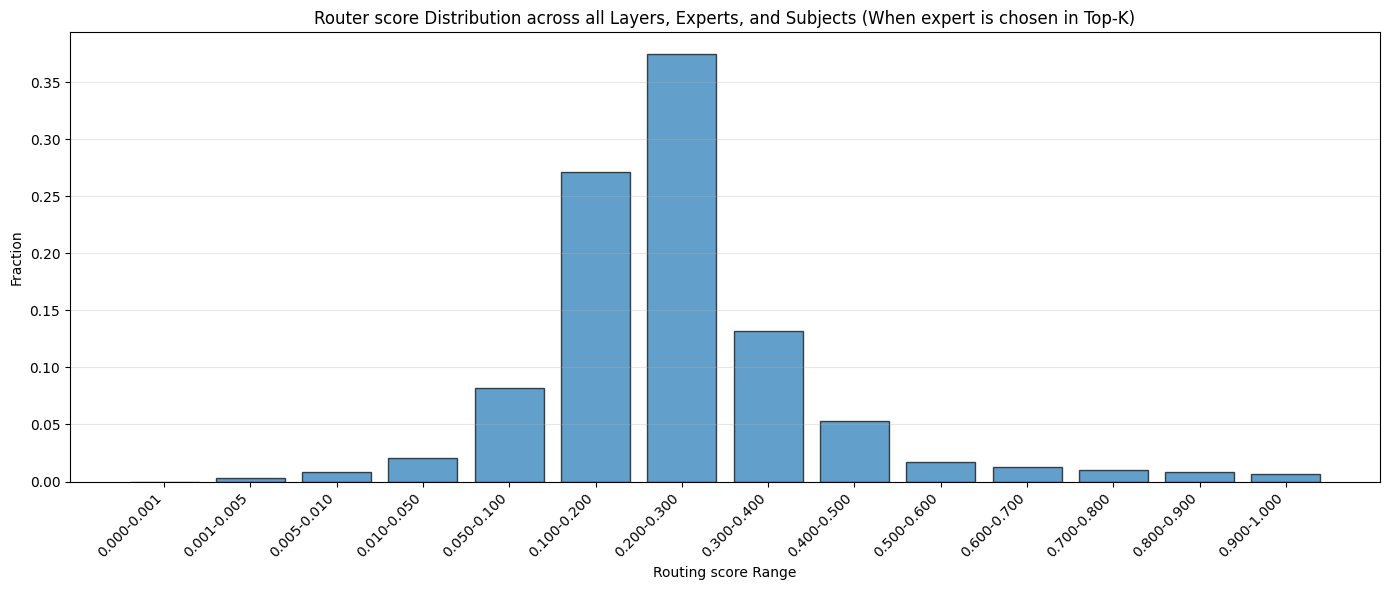

In [21]:
plot_router_distribution(gpt_oss_global_probs)

This model has the highest fraction of high probability routing values in the top-k (having a lot of valeus in the 0.3-0.4 range)

### Per layer router distribution

In [22]:
gpt_oss_per_layer_probs = get_per_layer_router_distribution(gpt_oss_subject_list)

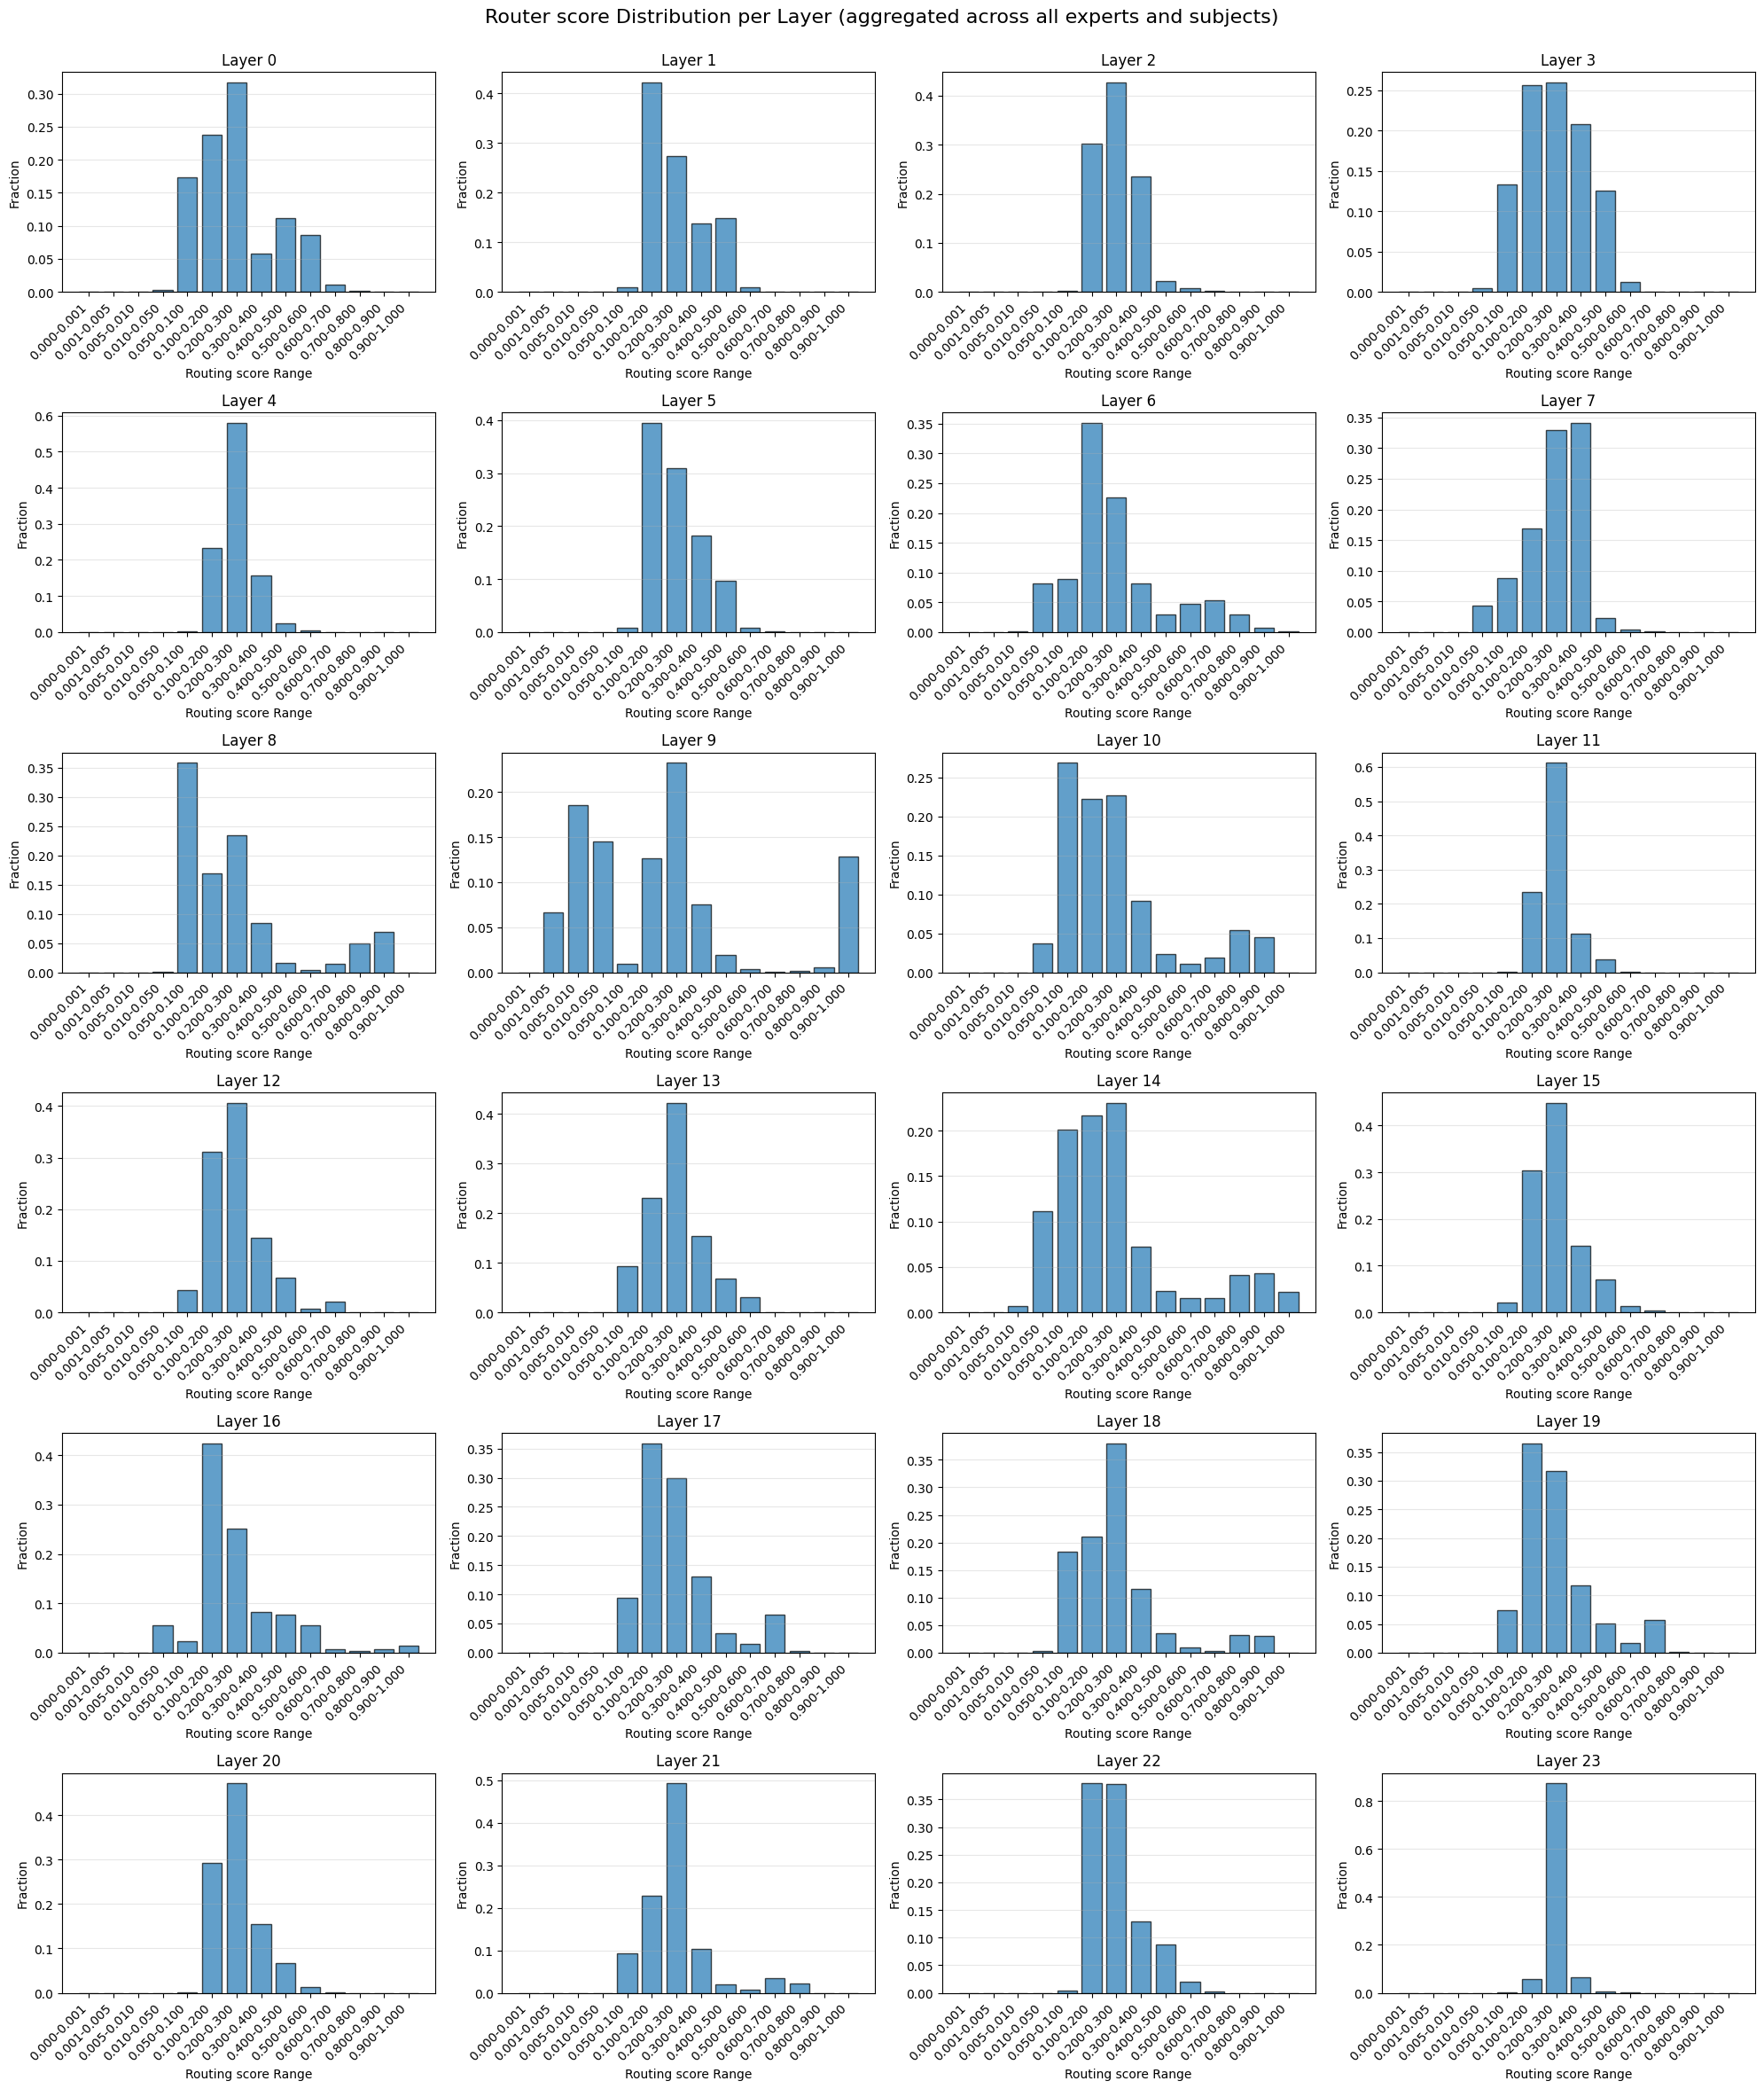

In [23]:
plot_per_layer_router_distribution(gpt_oss_per_layer_probs)

In [24]:
# memory cleanup

del gpt_oss_subject_list
del gpt_oss_global_probs
del gpt_oss_per_layer_probs

# OlMoE

This model has a top-k of 8 and it has 64 experts in total

## MMLU

In [25]:
olmoe_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/cais-mmlu"
olmoe_root_path = os.path.expandvars(olmoe_root_path)

olmoe_subject_list = create_dataset_routing_statistics(olmoe_root_path)

Found: virology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/cais-mmlu/virology/EN/router_distributions.pt
Found: computer_security/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/cais-mmlu/computer_security/EN/router_distributions.pt
Found: high_school_us_history/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/cais-mmlu/high_school_us_history/EN/router_distributions.pt
Found: professional_accounting/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/cais-mmlu/professional_accounting/EN/router_distributions.pt
Found: college_medicine/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-explorat

### Global router distribution

In [26]:
olmoe_global_probs = get_global_router_distribution(olmoe_subject_list)

Global probs shape: torch.Size([299358848])


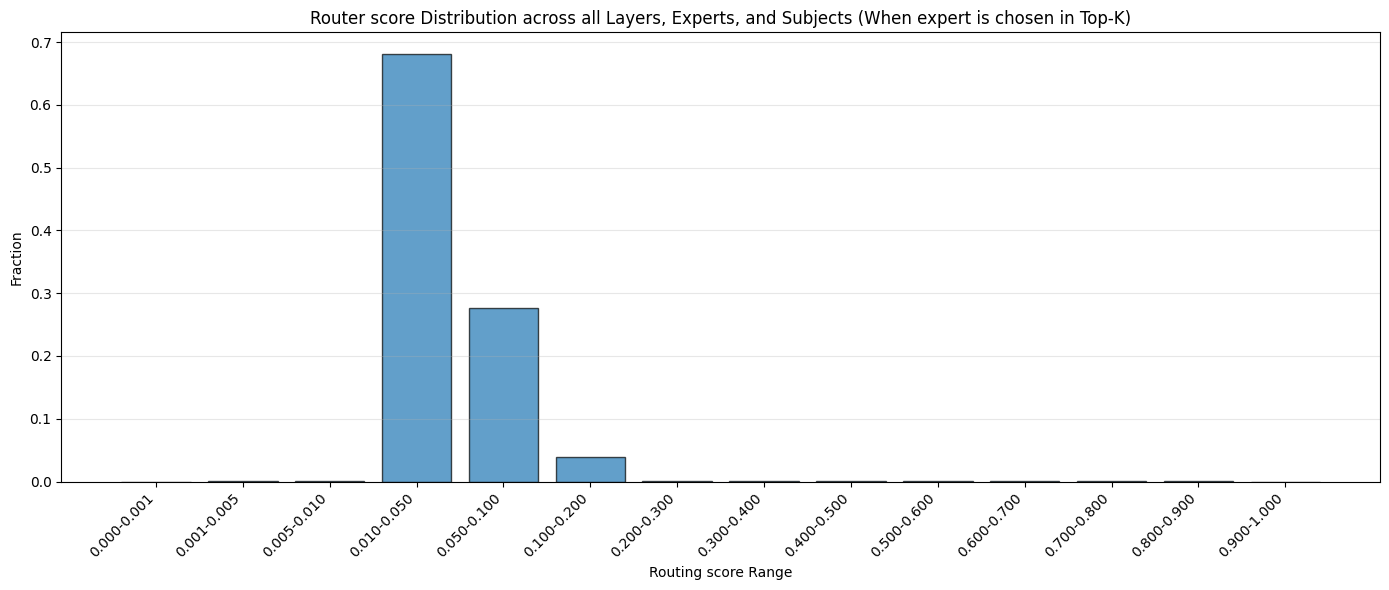

In [27]:
print(f"Global probs shape: {olmoe_global_probs.shape}")
plot_router_distribution(olmoe_global_probs)

### Per layer router distribution

In [28]:
olmoe_per_layer_probs = get_per_layer_router_distribution(olmoe_subject_list)

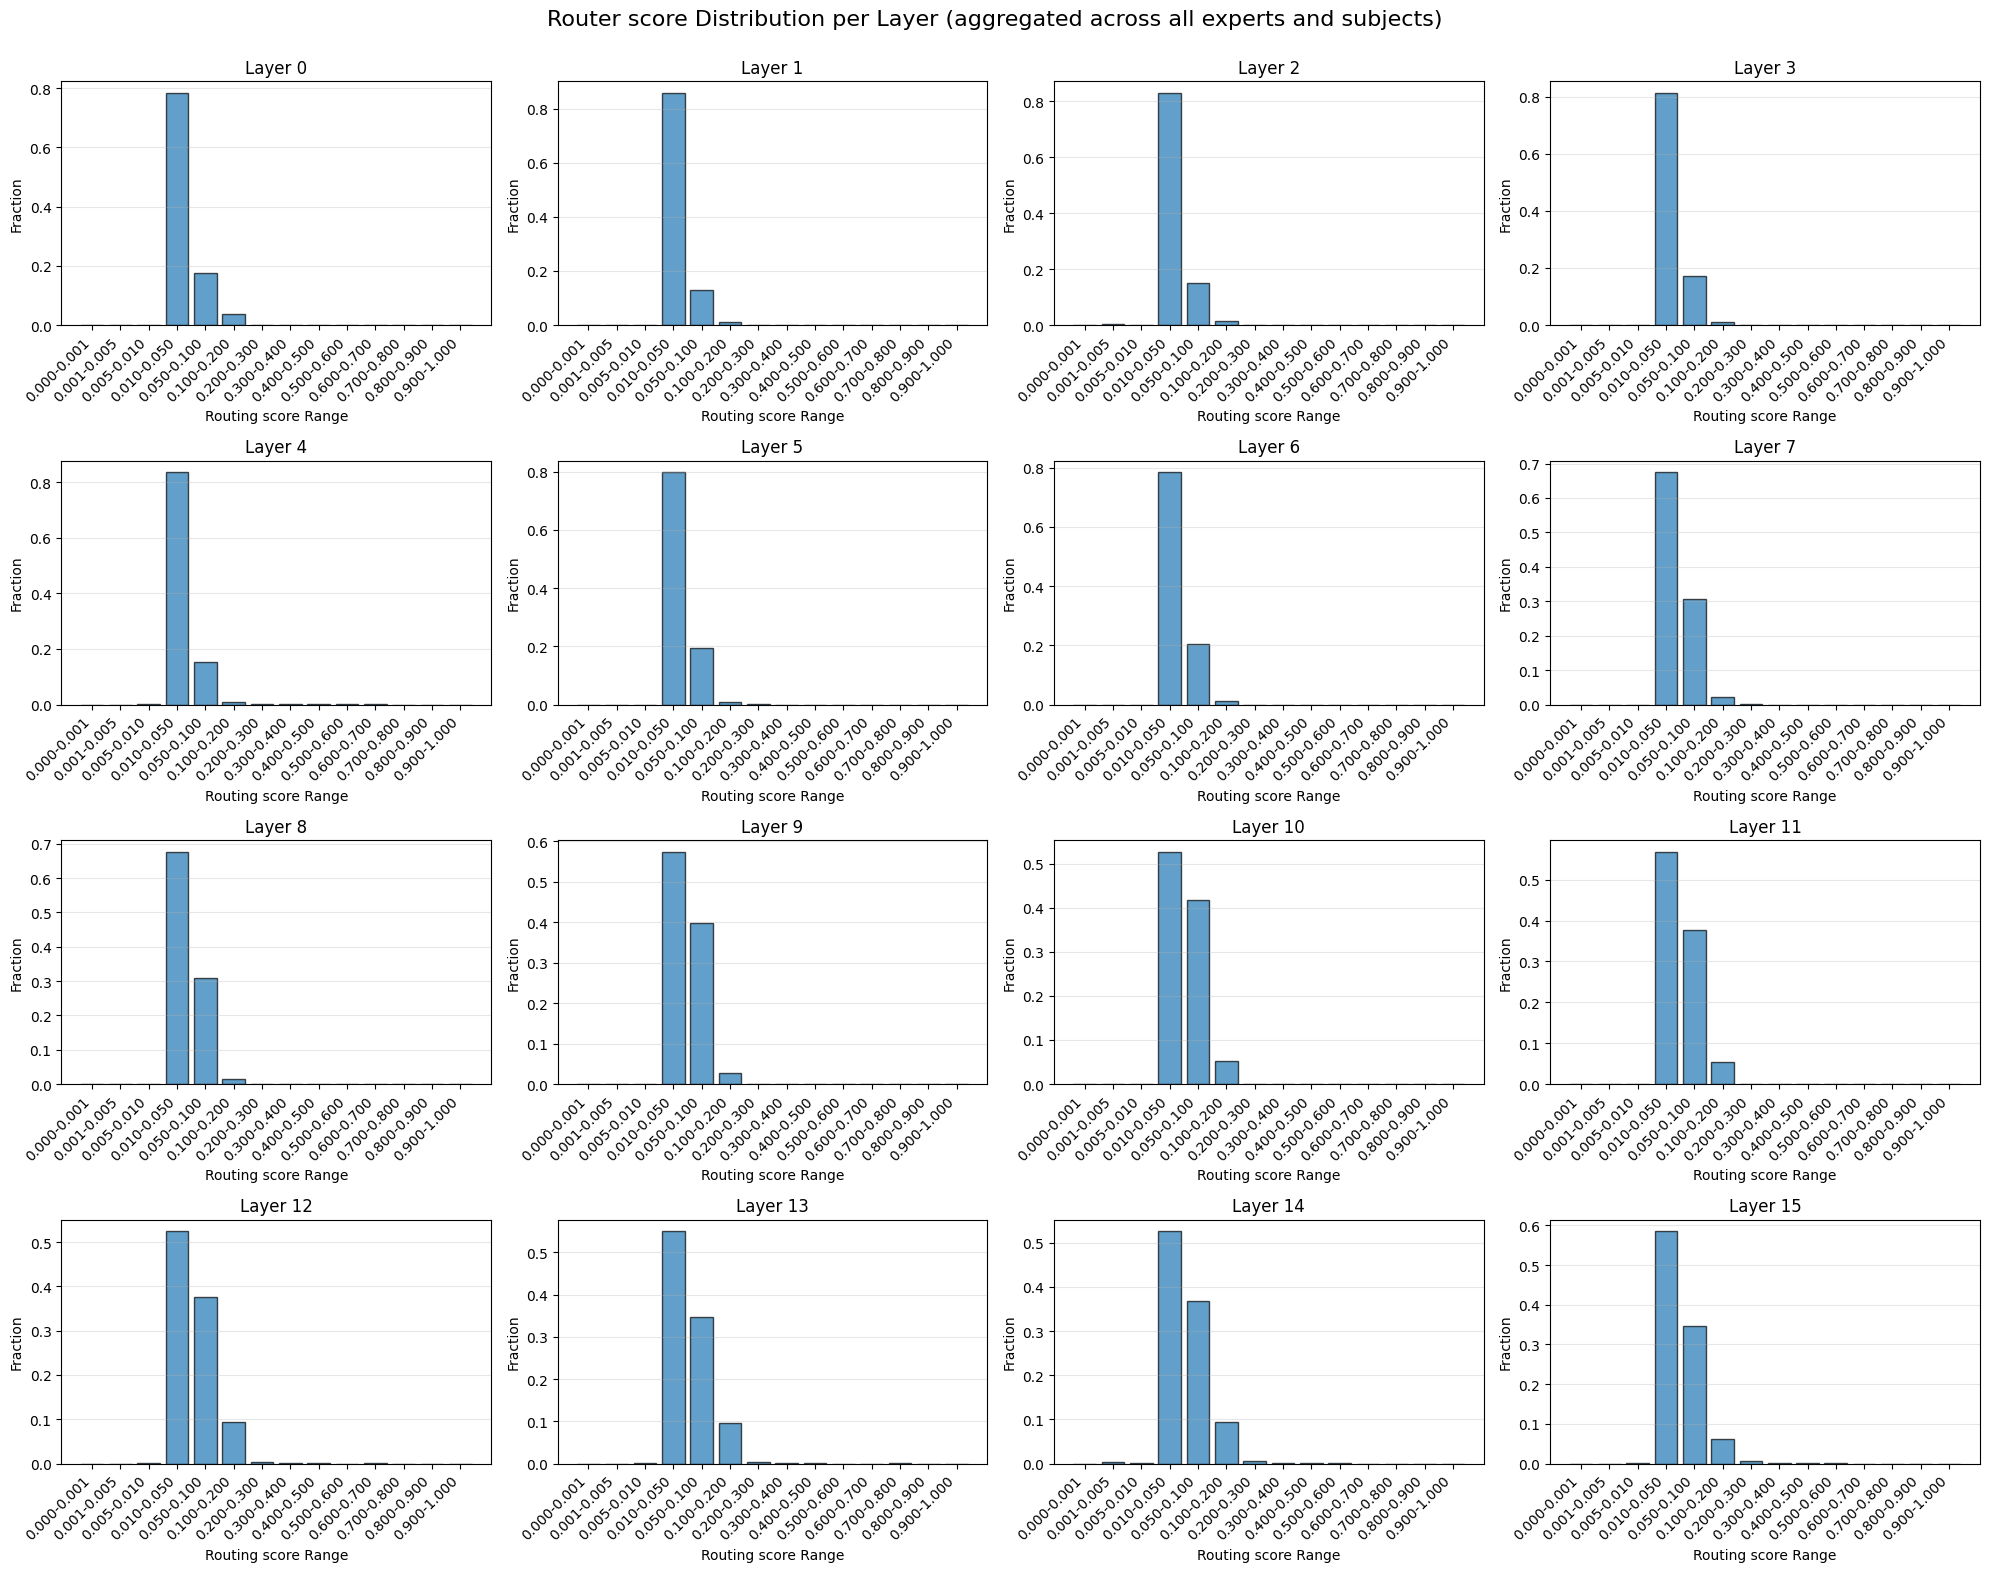

In [29]:
plot_per_layer_router_distribution(olmoe_per_layer_probs)

Why is olmoe so uniformly distributed among the chosen top-k experts for a token (in olmoe they also don't do a renormalization, by default the option is deactivated for the model in the hf config), like from all the models we have here, it is the only one that shows this type of score distribution (like literally all scores are in 3 to 2 ranges of values, always 0.05 to 1.0 is the biggest)

## MMLU PRO

In [30]:
olmoe_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/TIGER-Lab-MMLU-Pro"
olmoe_root_path = os.path.expandvars(olmoe_root_path)

olmoe_subject_list = create_dataset_routing_statistics(olmoe_root_path)

Found: biology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/TIGER-Lab-MMLU-Pro/biology/EN/router_distributions.pt
Found: chemistry/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/TIGER-Lab-MMLU-Pro/chemistry/EN/router_distributions.pt
Found: physics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/TIGER-Lab-MMLU-Pro/physics/EN/router_distributions.pt
Found: engineering/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-OLMoE-1B-7B-0125-Instruct/TIGER-Lab-MMLU-Pro/engineering/EN/router_distributions.pt
Found: economics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/allenai-O

### Global router distribution

In [31]:
olmoe_global_probs = get_global_router_distribution(olmoe_subject_list)
print(f"Global probs shape: {olmoe_global_probs.shape}")

Global probs shape: torch.Size([550171776])


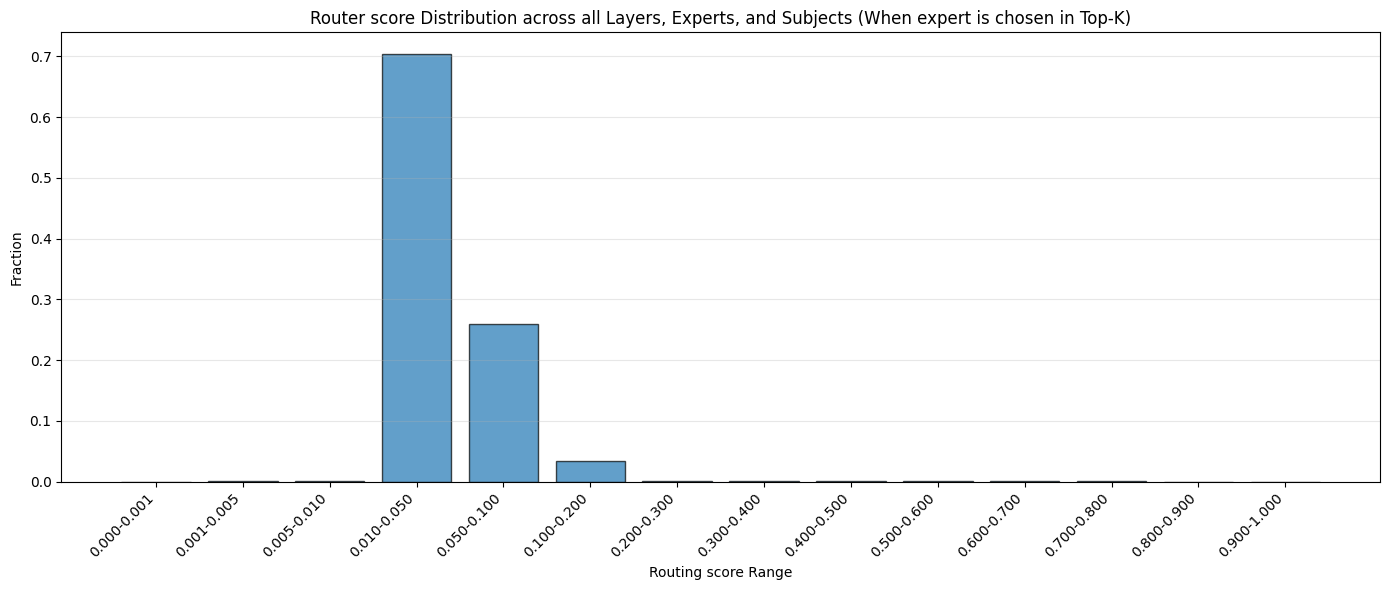

In [32]:
plot_router_distribution(olmoe_global_probs)

### Per layer router distribution

In [33]:
olmoe_per_layer_probs = get_per_layer_router_distribution(olmoe_subject_list)

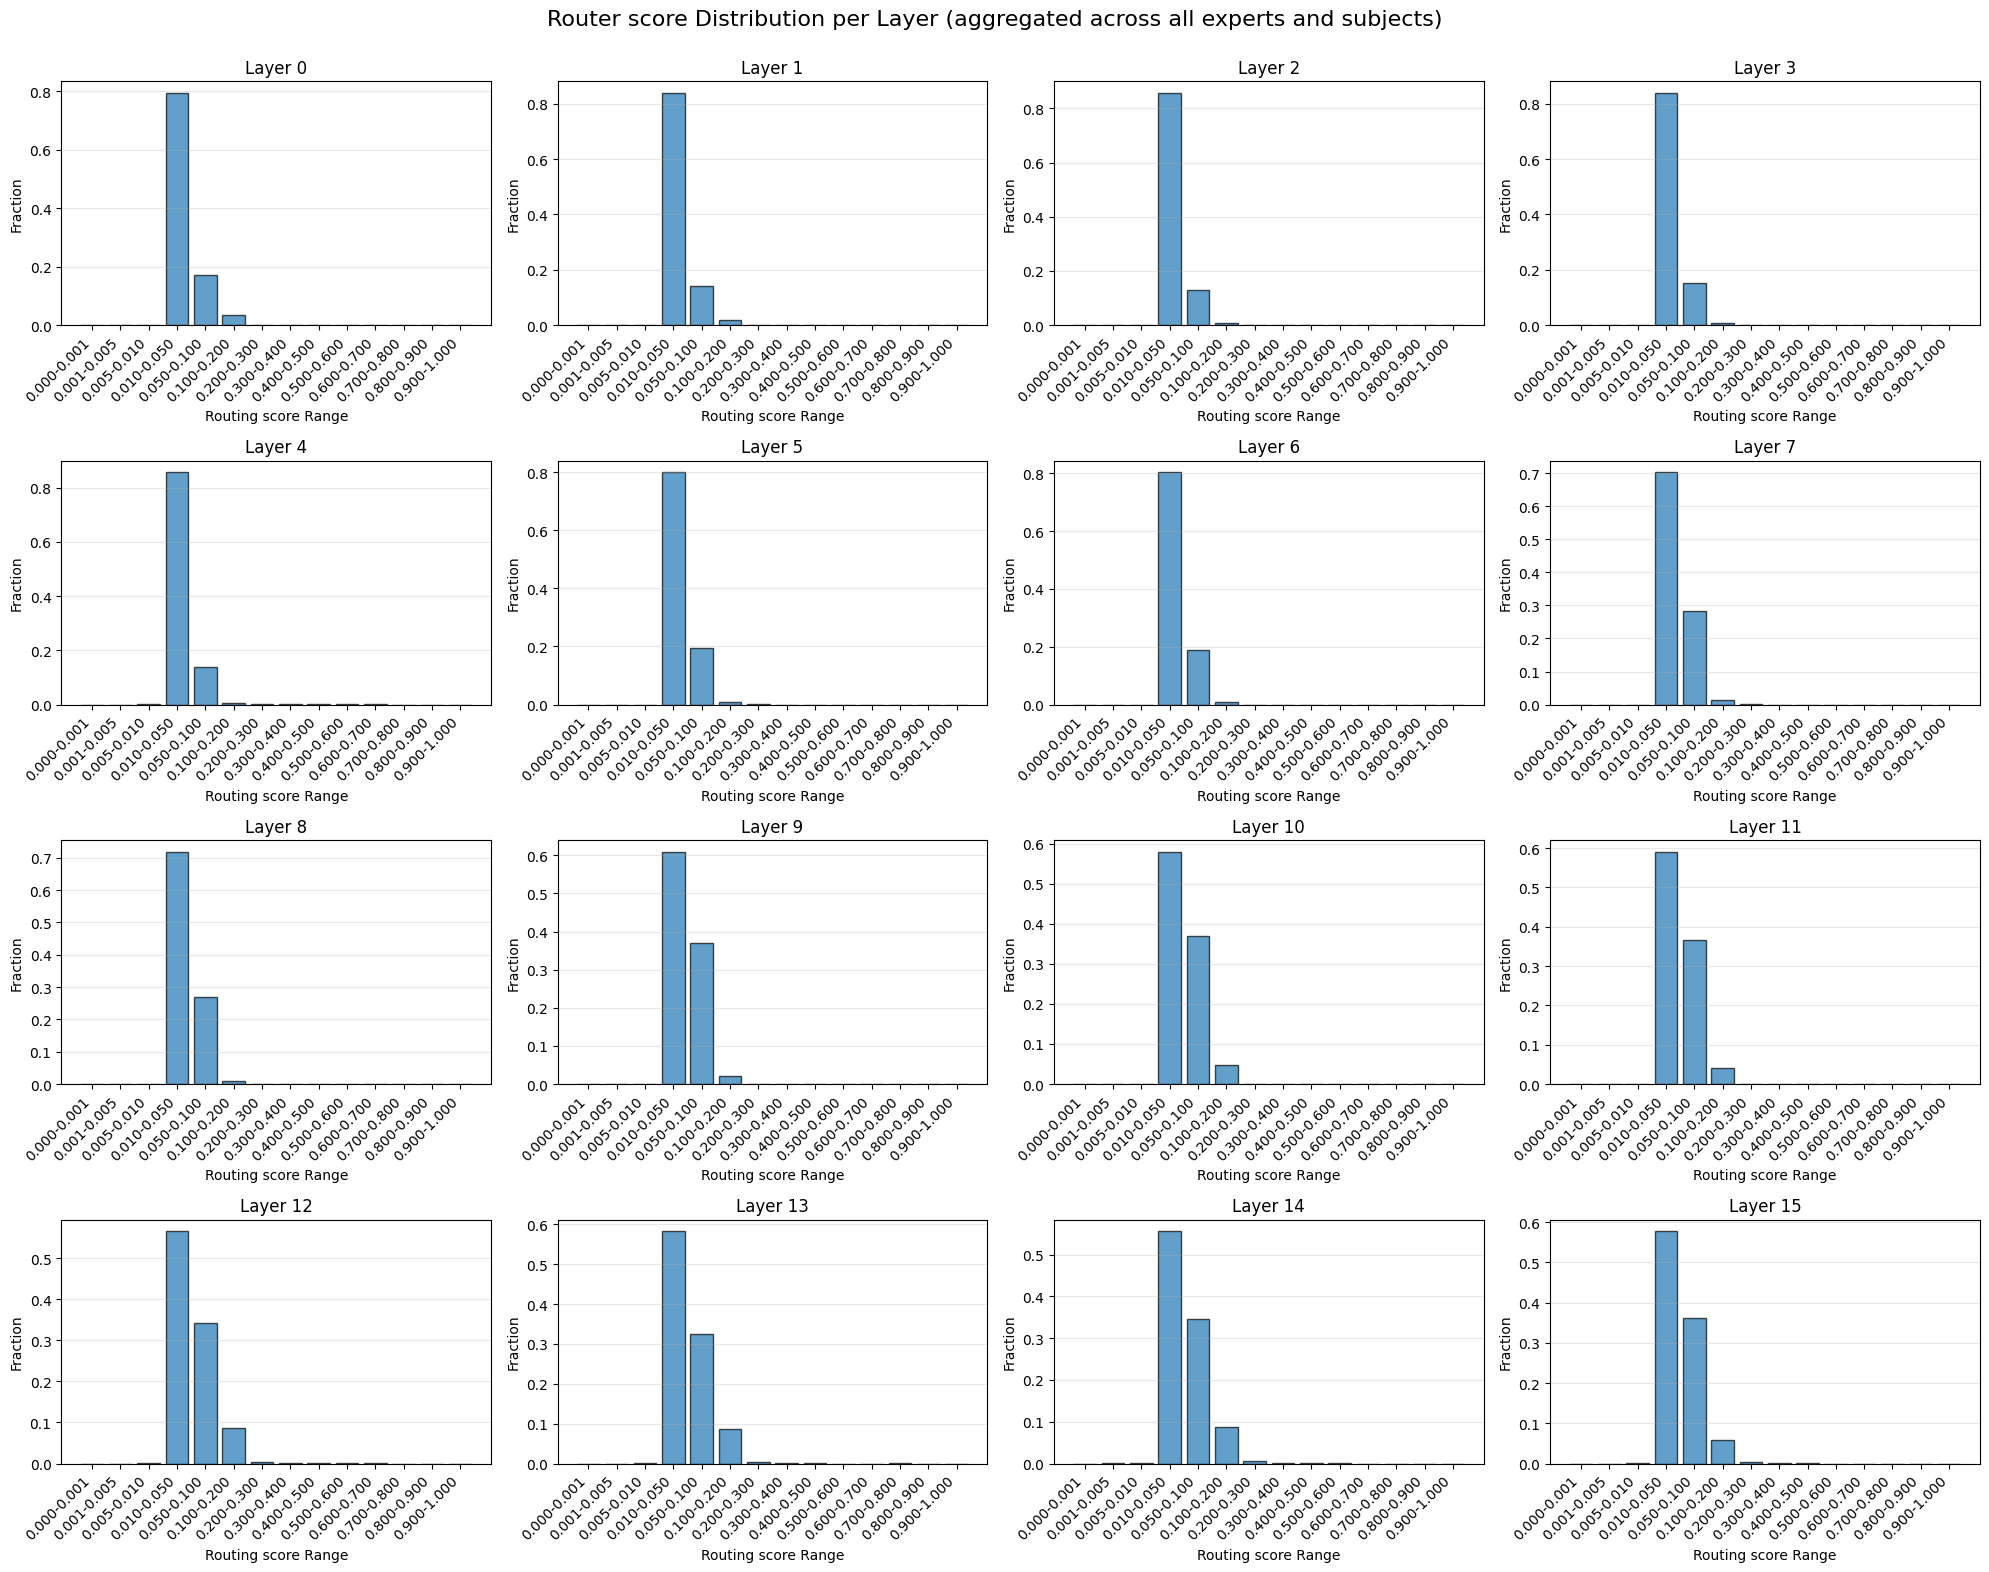

In [34]:
plot_per_layer_router_distribution(olmoe_per_layer_probs)

In [35]:
# memory cleanup

del olmoe_subject_list
del olmoe_global_probs
del olmoe_per_layer_probs

# Arcee Trinity

Trinity models use sigmoid router instead of softmax (with renormalization after top-k and a router-scale value), and here we are visualizing the values after the router scaling (so if we are seeing the values before the scaling then a value 0.5 multiplied by their router scale (here is bigger than 2.0) it would give us a value bigger than 0.1).

It seems the idea of the router scale is to increase how much the experts are contributing to the weighted sum

This model has a top-k of 8 and it has 128 routable experts and 1 shared expert, it uses sigmoid router instead of softmax and a router_scaling scalar, and the first two layers are dense

## MMLU

In [36]:
trinity_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/cais-mmlu"
trinity_root_path = os.path.expandvars(trinity_root_path)

trinity_subject_list = create_dataset_routing_statistics(trinity_root_path)

Found: virology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/cais-mmlu/virology/EN/router_distributions.pt
Found: computer_security/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/cais-mmlu/computer_security/EN/router_distributions.pt
Found: high_school_us_history/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/cais-mmlu/high_school_us_history/EN/router_distributions.pt
Found: professional_accounting/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/cais-mmlu/professional_accounting/EN/router_distributions.pt
Found: college_medicine/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distrib

### Global router distribution

In [37]:
trinity_global_probs = get_global_router_distribution(trinity_subject_list)

Global probs shape: torch.Size([967816944])


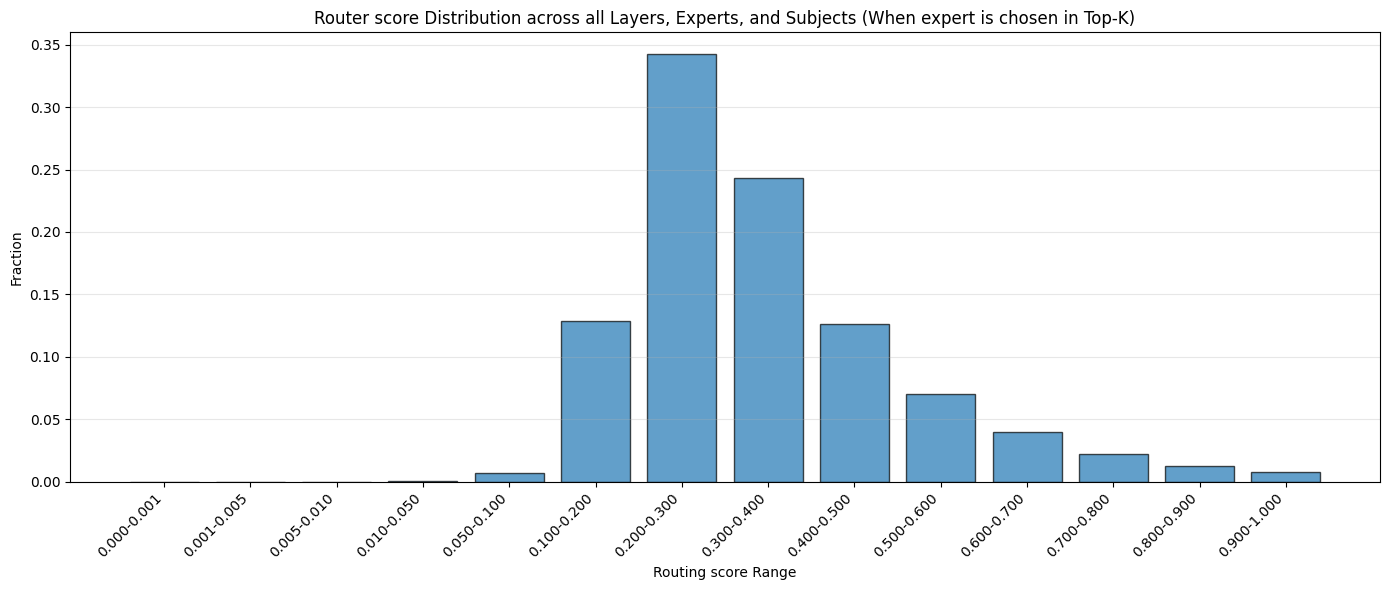

In [38]:
print(f"Global probs shape: {trinity_global_probs.shape}")

plot_router_distribution(trinity_global_probs)

### Per layer router distribution

In [39]:
trinity_per_layer_probs = get_per_layer_router_distribution(trinity_subject_list)

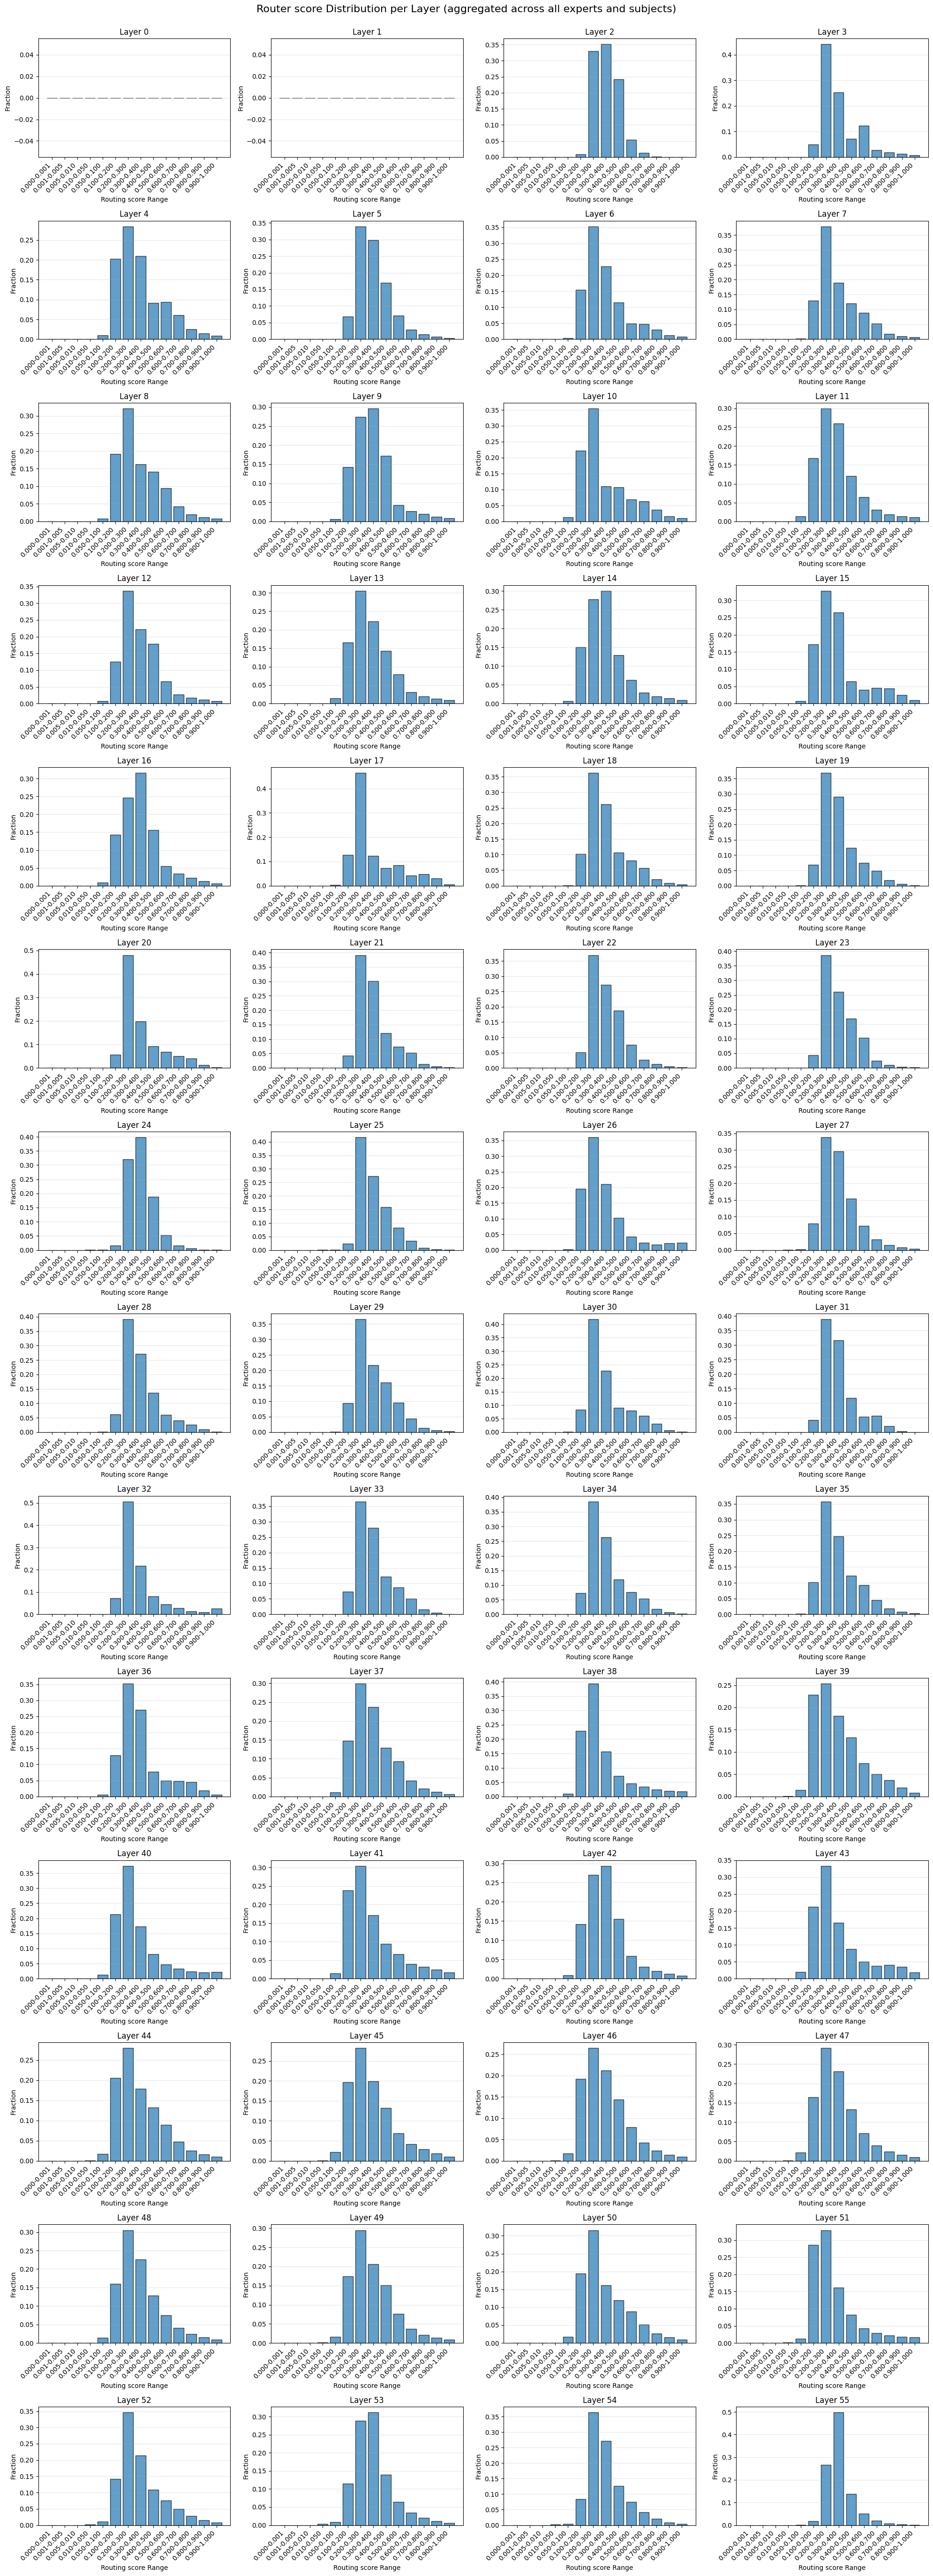

In [40]:
plot_per_layer_router_distribution(trinity_per_layer_probs)

## MMLU PRO

In [41]:
trinity_root_path = "$SCRATCH/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/TIGER-Lab-MMLU-Pro"
trinity_root_path = os.path.expandvars(trinity_root_path)

trinity_subject_list = create_dataset_routing_statistics(trinity_root_path)

Found: biology/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/TIGER-Lab-MMLU-Pro/biology/EN/router_distributions.pt
Found: chemistry/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/TIGER-Lab-MMLU-Pro/chemistry/EN/router_distributions.pt
Found: physics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/TIGER-Lab-MMLU-Pro/physics/EN/router_distributions.pt
Found: engineering/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/TIGER-Lab-MMLU-Pro/engineering/EN/router_distributions.pt
Found: economics/EN/router_distributions.pt
/iopsstor/scratch/cscs/anowak/moe-router-exploration-data/router_prob_distribution/arcee-ai-Trinity-Nano-Base/TIGER-Lab-

### Global router distribution

Global probs shape: torch.Size([1819681632])


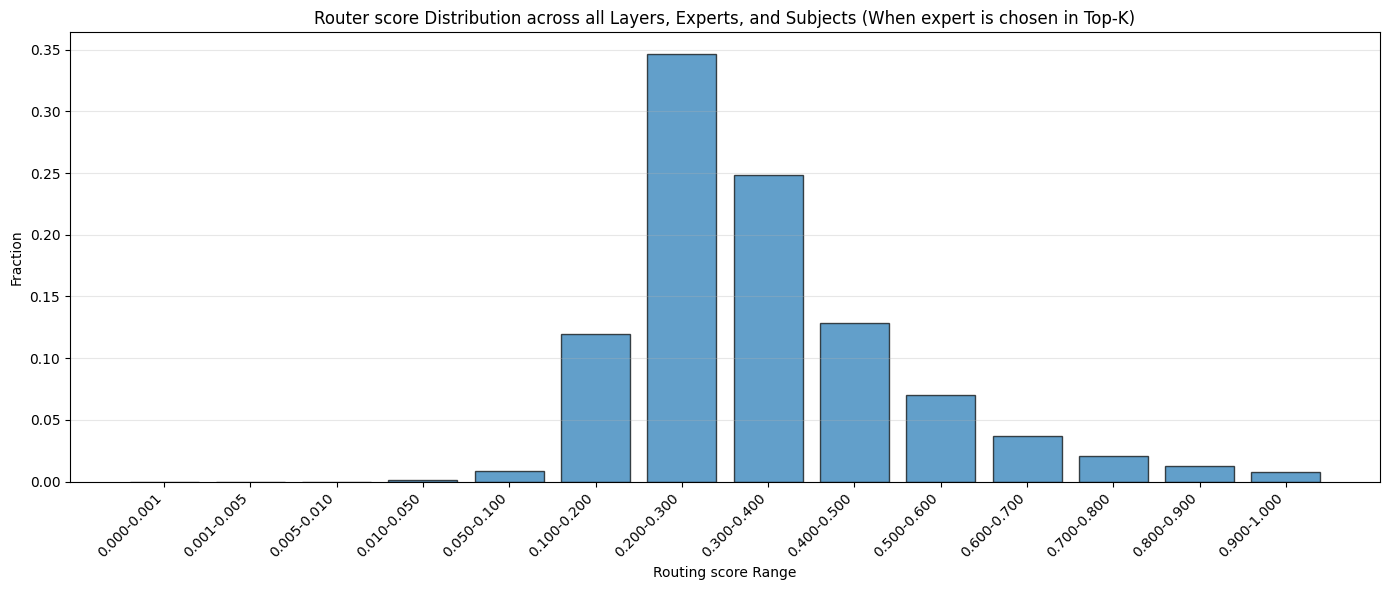

In [42]:
trinity_global_probs = get_global_router_distribution(trinity_subject_list)
print(f"Global probs shape: {trinity_global_probs.shape}")

plot_router_distribution(trinity_global_probs)

### Per layer distribution

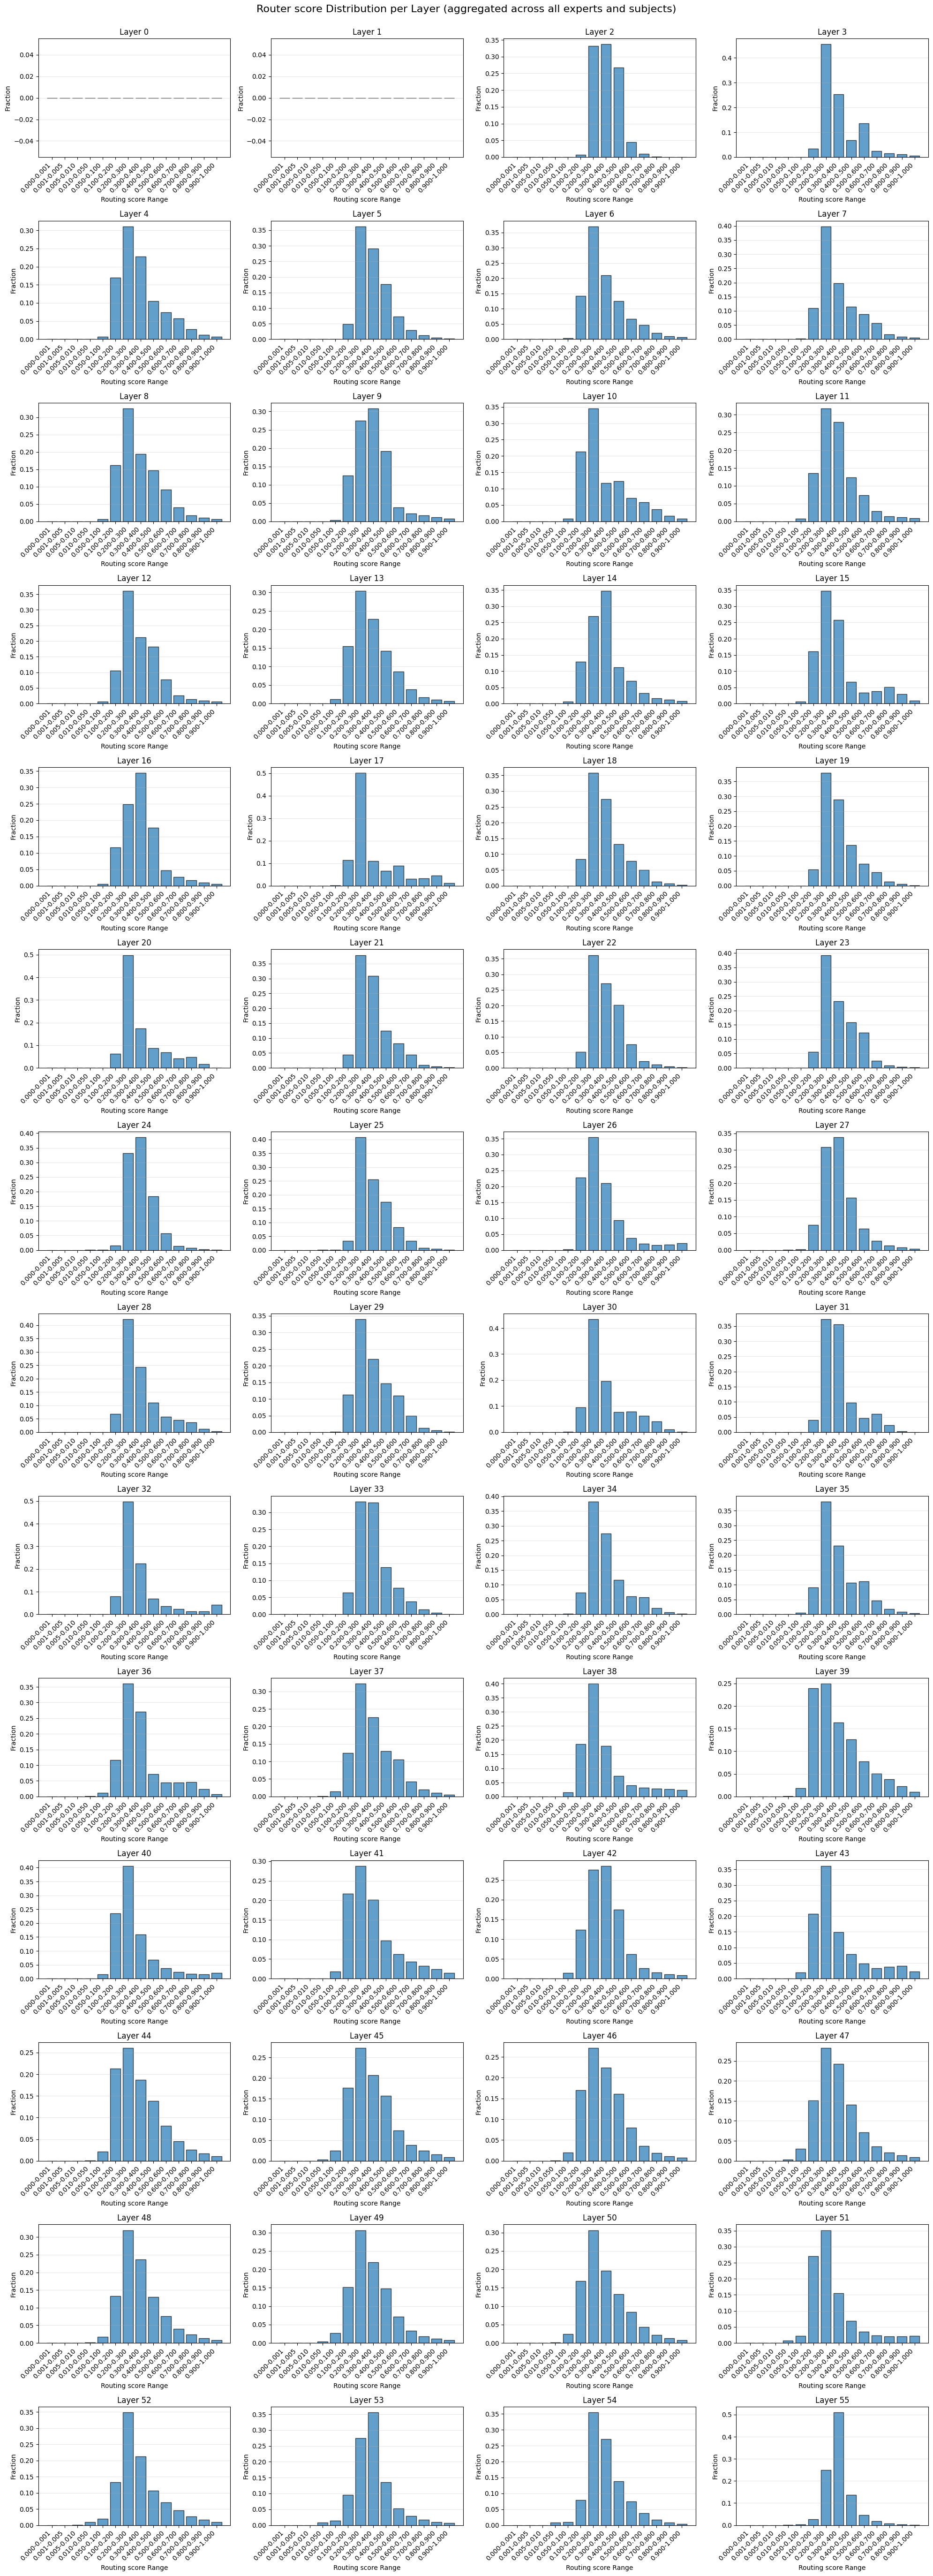

In [43]:
trinity_per_layer_probs = get_per_layer_router_distribution(trinity_subject_list)
plot_per_layer_router_distribution(trinity_per_layer_probs)

### Per expert router distribution

In [44]:
trinity_per_expert_probs = get_per_expert_router_distribution(trinity_subject_list)

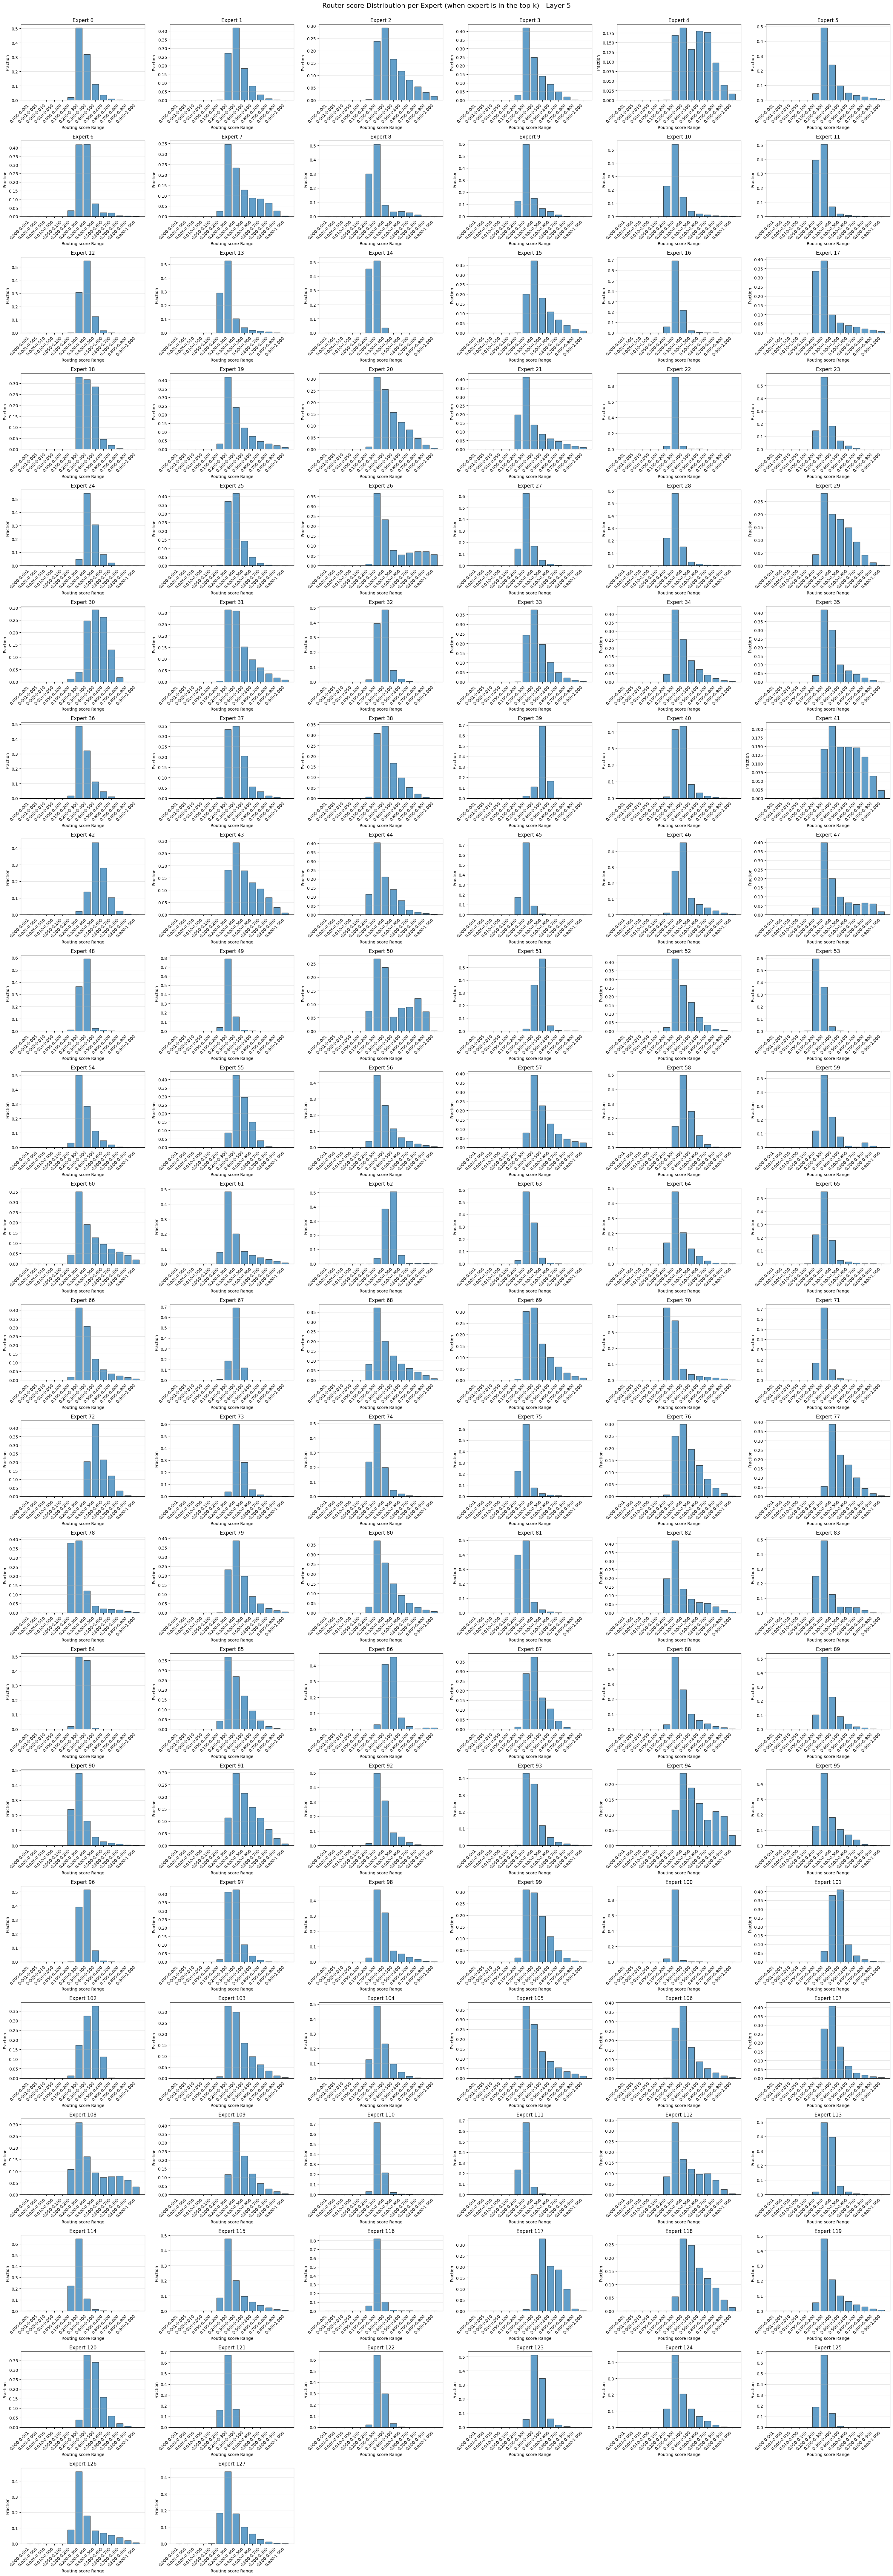

In [45]:
plot_per_expert_router_distribution(trinity_per_expert_probs, layer=5)

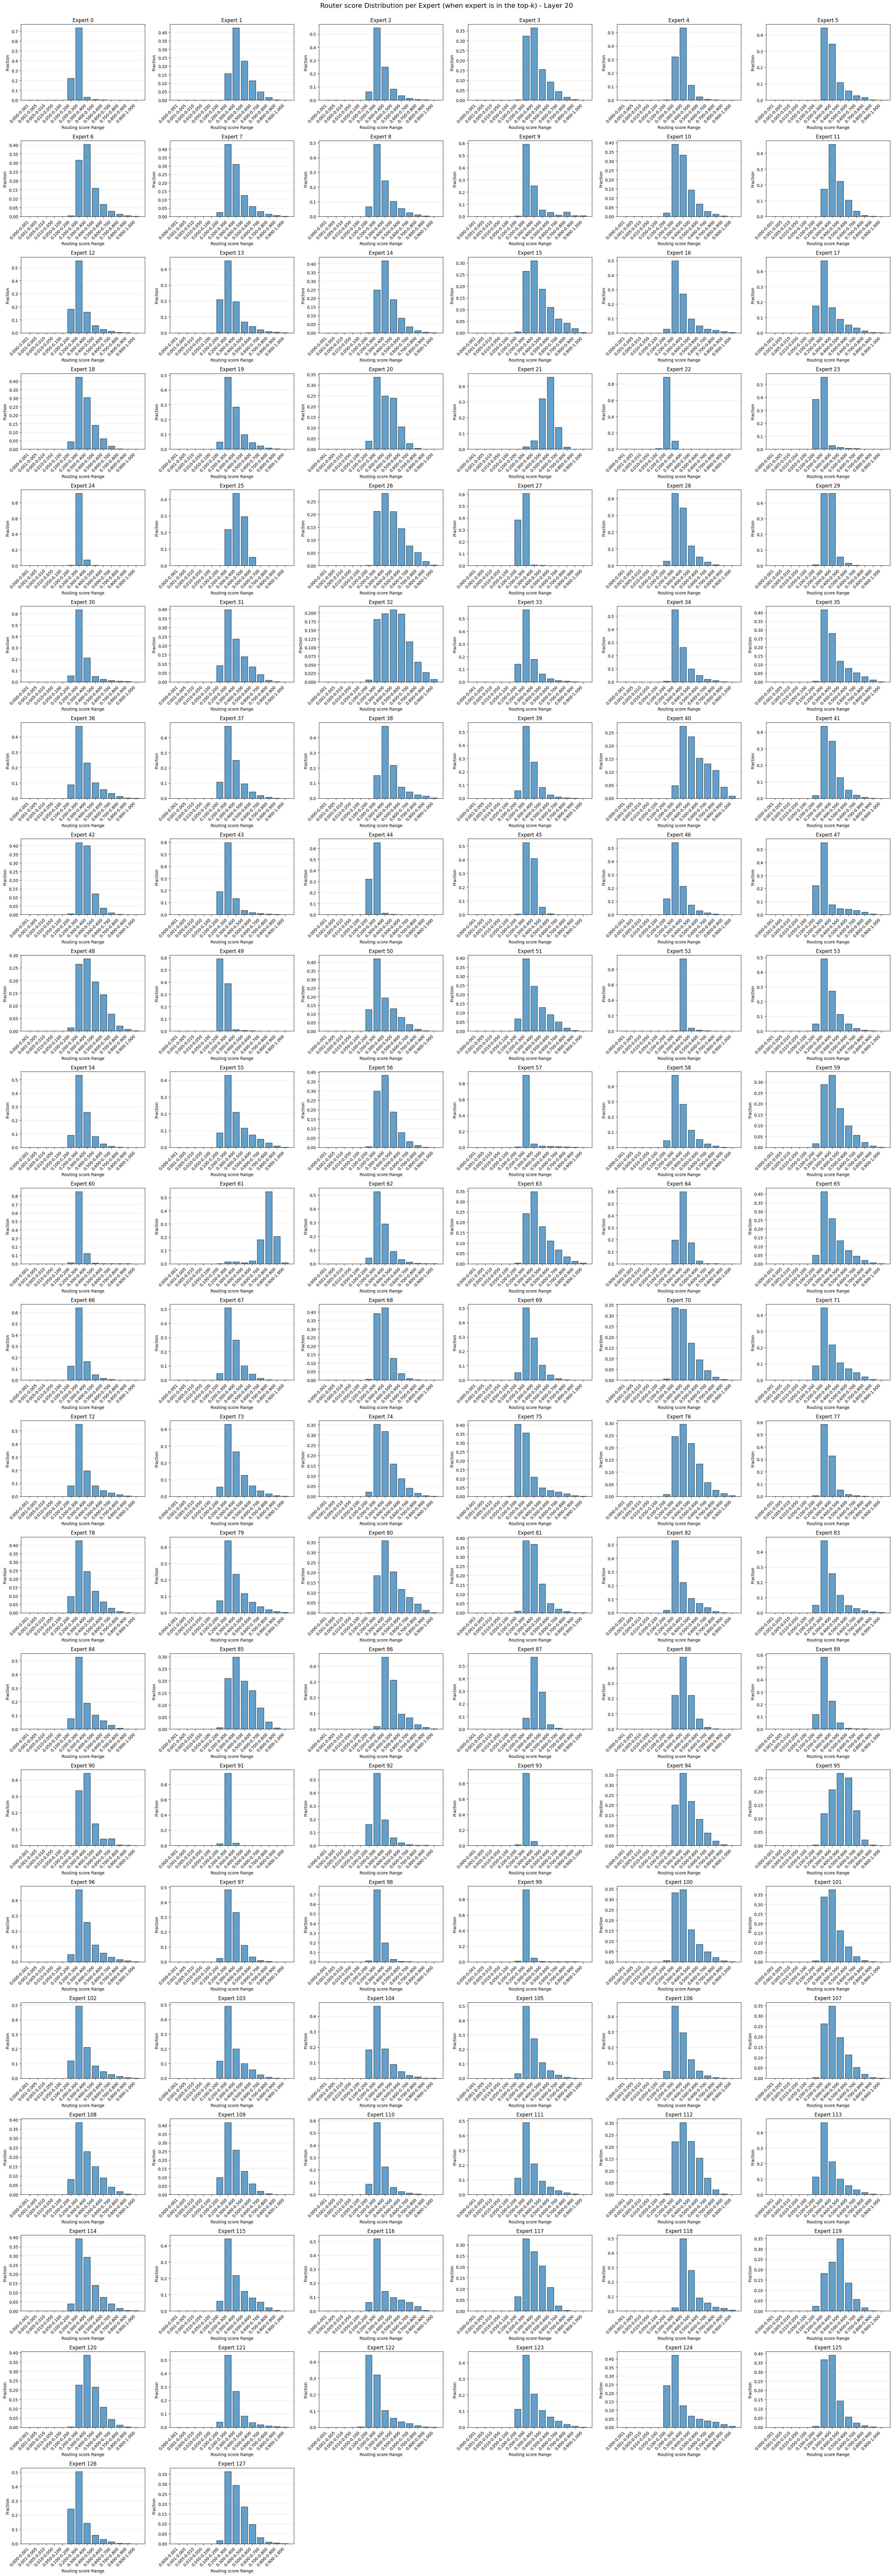

In [46]:
plot_per_expert_router_distribution(trinity_per_expert_probs, layer=20)

In [47]:
# memory cleanup

del trinity_subject_list
del trinity_global_probs
del trinity_per_expert_probs

# Evaluation results removing expert outputs that have a router prob below a threshold $T$

For the weighted sum $\sum^N_{j=1} g_j(x_i)E_j(x_i)$, we do $g(x_i)=0$ if $g(x_i)<T$ for the probability (or score) values of the top-k experts selected for token $i$.

The idea is that maybe the router learns to even in the top-k values give a low score to many of the experts sometimes for some tokens (so as to also help specialize the models so they don't get signal they don't care about), so based on this idea that maybe it is possible to not do computation for some experts without doing this idea of zero-experts by training the model from scratch

*For Arcee trinity we do the threshold before the scaling of the router scores with the router scale `top_scores = top_scores * module.route_scale`, so here a score of 0.4 is $0.4 \cdot 2.826=1.1304$ (from https://huggingface.co/arcee-ai/Trinity-Nano-Base/blob/main/config.json), so doing the threshold for the values below 0.1 means the values below $\approx0.3$ (more exact below $2.826$). We mention this because in the exploration above in the datasets is based on the values after the router scaling*

In [48]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt


In [49]:
eval_results_path = "eval_results/moe_router_distribution_eval"
all_models = os.listdir(eval_results_path)
benchmarks_list = ["hellaswag", "arc_easy", "winogrande", "mmlu"]

def get_model_results_dataframe(eval_results_path, all_models):
    all_results = []
    
    for model_name in all_models:
        path = os.path.join(eval_results_path, model_name)
        
        if not os.path.isdir(path):
            continue
        
        result = os.listdir(path)
        
        for file_name in result:
            if file_name.endswith(".json"):
                file_path = os.path.join(path, file_name)
        
                with open(file_path, "r") as f:
                    data = json.load(f)
                    
                    row = {
                        "model_name": model_name,
                        "prob_threshold": data["model_info"]["prob_threshold"],
                    }
                    
                    for benchmark, metrics in data["results"].items():
                        if benchmark not in benchmarks_list:
                            continue
                        for metric, value in metrics.items():
                            if metric != "alias" and "stderr" not in metric:
                                row[f"{benchmark}_{metric}"] = value
                    
                    all_results.append(row)
    
    return pd.DataFrame(all_results)

model_results_df = get_model_results_dataframe(eval_results_path, all_models)
model_results_df

model_name  prob_threshold  hellaswag_acc,none  hellaswag_acc_norm,none  \
0   deepseek-moe            0.00            0.580362                 0.773153   
1   deepseek-moe            0.01            0.580562                 0.772954   
2   deepseek-moe            0.05            0.576678                 0.767078   
3   deepseek-moe            0.10            0.508962                 0.683928   
4         gptoss            0.00            0.416053                 0.577475   
5         gptoss            0.01            0.415156                 0.579267   
6         gptoss            0.05            0.415156                 0.579964   
7         gptoss            0.10            0.416650                 0.580960   
8          olmoe            0.00            0.579865                 0.769468   
9          olmoe            0.01            0.579267                 0.770165   
10         olmoe            0.05            0.485262                 0.649173   
11         olmoe            0.10            0.260406                 0.272555   
12       trinity            0.00            0.571101                 0.760805   
13       trinity            0.01            0.571201                 0.759709   
14       trinity            0.05            0.570703                 0.758415   
15       trinity            0.10            0.555268                 0.740888   

    arc_easy_acc,none  arc_easy_acc_norm,none  winogrande_acc,none  \
0            0.760943                0.728535             0.699290   
1            0.760943                0.728956             0.696133   
2            0.756734                0.725168             0.700079   
3            0.696128                0.663721             0.631413   
4            0.773990                0.752104             0.656669   
5            0.775673                0.753788             0.659037   
6            0.775253                0.754630             0.662194   
7            0.776936                0.752946             0.660616   
8            0.782828                0.765993             0.682715   
9            0.779882                0.762626             0.686661   
10           0.734848                0.707912             0.589582   
11           0.268519                0.278620             0.509077   
12           0.821970                0.785354             0.683504   
13           0.819865                0.791246             0.683504   
14           0.816498                0.786616             0.683504   
15           0.818603                0.773569             0.668508   

    mmlu_acc,none  
0        0.377724  
1        0.377297  
2        0.378507  
3        0.275744  
4        0.563239  
5        0.563880  
6        0.564165  
7        0.567227  
8        0.506552  
9        0.505484  
10       0.351731  
11       0.247472  
12       0.635593  
13       0.636377  
14       0.635380  
15       0.624341

In [50]:
def plot_model_performance(model_results_df, model_name, benchmarks: list[str]):
    """
    Plot all benchmark metrics (both acc and acc_norm) on the same graph for a specific model.
    
    Args:
        model_results_df: DataFrame with columns [model_name, prob_threshold, benchmark metrics]
        model_name: Name of the model to visualize
    """
    model_data = model_results_df[model_results_df["model_name"] == model_name].sort_values("prob_threshold")
    
    if model_data.empty:
        print(f"No data found for model: {model_name}")
        return
    
    plt.figure(figsize=(8, 4))
    
    colors = plt.cm.tab10(range(len(benchmarks)))
    
    for idx, benchmark in enumerate(benchmarks):
        acc_col = f"{benchmark}_acc,none"
        acc_norm_col = f"{benchmark}_acc_norm,none"
        
        if acc_col in model_data.columns:
            plt.plot(model_data["prob_threshold"], model_data[acc_col], 
                    marker='o', label=f"{benchmark} (acc)", linewidth=2, 
                    markersize=8, color=colors[idx], linestyle='-')
        
        if acc_norm_col in model_data.columns:
            plt.plot(model_data["prob_threshold"], model_data[acc_norm_col], 
                    marker='s', label=f"{benchmark} (acc_norm)", linewidth=2, 
                    markersize=7, color=colors[idx], linestyle='--', alpha=0.8)
    
    plt.xlabel("Probability Threshold", fontsize=13)
    plt.ylabel("Accuracy", fontsize=13)
    plt.title(f"{model_name}: Performance vs Probability Threshold", fontsize=15, fontweight='bold')
    plt.legend(fontsize=10, loc='best', ncol=2)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

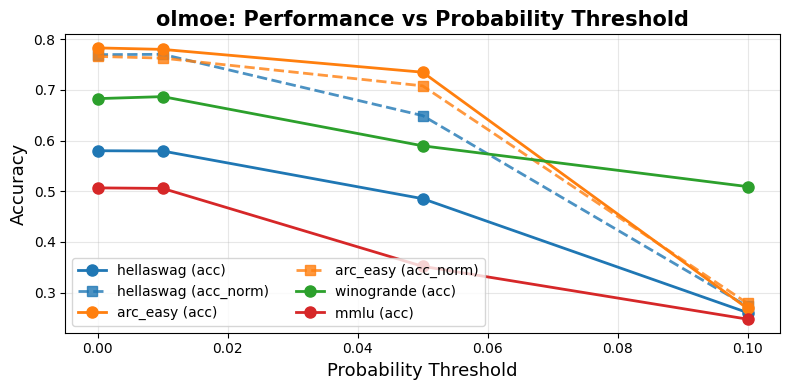

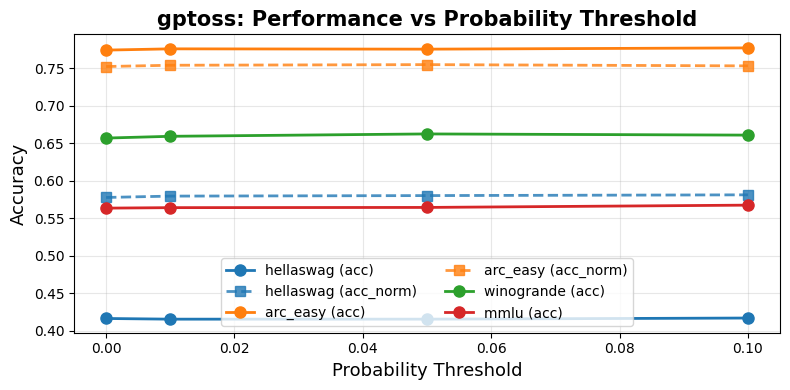

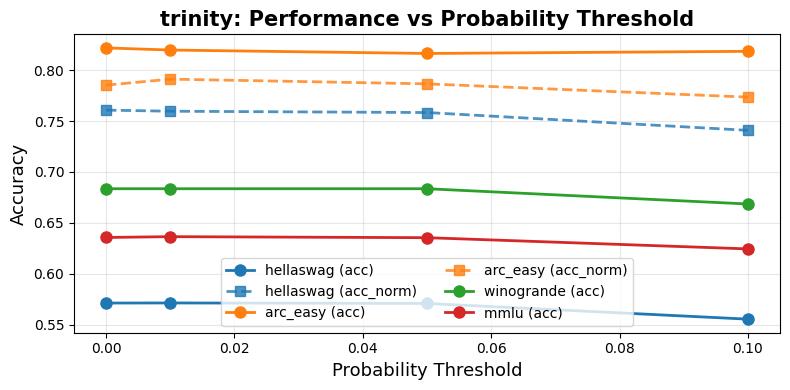

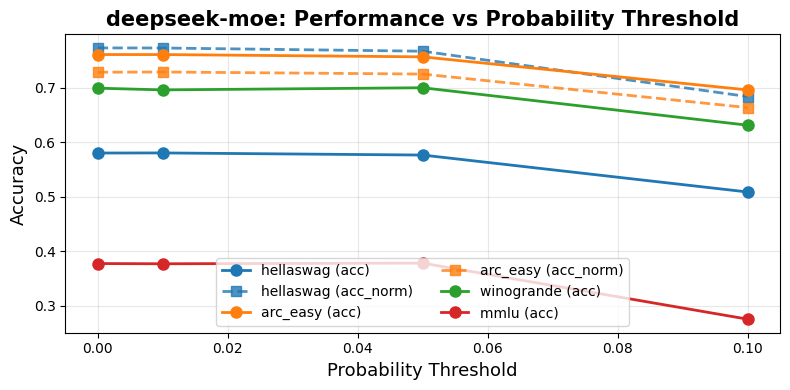

In [51]:
plot_model_performance(model_results_df, "olmoe", benchmarks_list)
plot_model_performance(model_results_df, "gptoss", benchmarks_list)
plot_model_performance(model_results_df, "trinity", benchmarks_list)
plot_model_performance(model_results_df, "deepseek-moe", benchmarks_list)
